# HarvardX - Data Science Capstone: MovieLens Project

## 1. Introduction

Recommendation systems use historic ratings of products/services by users to make specific recommendations. They are based on ratings' predictions. Previous ratings from a given user are used to predict what rating he/she would give to a specific item and items for which a high rating is predicted are then recommended to that user.

Many organizations such as Amazon and Netflix use recommendation systems to predict how many stars a user would give a specific item. One star suggests they don't like the item, whereas five stars suggests they love it.

In this project, we will build our movie recommendation system where we will predict ratings for a set of users whose actual ratings are hidden. We check the performance of our predictions against two metrics RMSE and Accuracy.

**Important Note: Running the code of this project could mobilize the full resources of your machine and the process could take several hours to complete.** The code has been validated on an i7 CPU with 16 GB RAM machine and Jupyterlab version 0.35.3 for macOS 10.14.2.

## 2. Data

The MovieLens dataset that we are using for this project is provided by GroupLens, a research lab in the Department of Computer Science and Engineering at the University of Minnesota. 

GroupLens has collected and made available rating datasets from their website (https://grouplens.org/datasets/movielens/). The datasets were collected over various periods of time, depending on the size of the set.
 
* **MovieLens 100K Dataset (size 5 MB)**

    Stable benchmark dataset. 100,000 ratings from 1,000 users on 1,700 movies. Released 4/1998.
    
* **MovieLens 1M Dataset (size 6 MB)**

    Stable benchmark dataset. 1 million ratings from 6,000 users on 4,000 movies. Released 2/2003.
    
* **MovieLens 10M Dataset (size 63 MB)**

    Stable benchmark dataset. 10 million ratings and 100,000 tag applications applied to 10,000 movies by 72,000 users. Released 1/2009.
    
* **MovieLens 20M Dataset (size 190 MB)**
    
    Stable benchmark dataset. 20 million ratings and 465,000 tag applications applied to 27,000 movies by 138,000 users. Includes tag genome data with 12 million relevance scores across 1,100 tags. Released 4/2015 - updated 10/2016.
    
* **MovieLens Tag Genome Dataset (size 41MB)**

    11 million computed tag-movie relevance scores from a pool of 1,100 tags applied to 10,000 movies. Released 3/2014. 
    
    The tag genome is a data structure that encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.)
    
    This dataset contains the tag relevance values that make up the tag genome. Tag relevance represents the relevance of a tag to a movie on a continuous scale from 0 to 1. 
    
    Note the MovieLens 20M also contains (more recent) tag genome data.

For this project, we are using the **MovieLens 10M** dataset. 

In this dataset, users were selected at random from the online movie recommender service MovieLens. Users selected had rated at least 20 movies. No demographic information is included. each user is represented by an Id, and no further information is provided. The data are contained in 3 files:

* **movies.dat**

    Movie information is contained in this file. Each line represents one movie and has the following format MovieID::Title::Genres.
    
    * MovieID is the MovieLens id.
    
    * Movie titles include year of release. They are entered manually, so errors and inconsistencies may exist.
    
    * Genres are pipe-separated list and are selected from the following:
    
      - Action
      - Adventure
      - Animation
      - Children
      - Comedy
      - Crime
      - Documentary
      - Drama
      - Fantasy
      - Film-Noir
      - Horror
      - IMAX
      - Musical
      - Mystery
      - Romance
      - Sci-Fi
      - Thriller
      - War
      - Western

        
 * **ratings.dat**

    All ratings are contained in this file. Each line of this file represents one rating of one movie by one user, and has the following format UserID::MovieID::Rating::Timestamp.
    
    * The lines within this file are ordered first by UserID, then, within user, by MovieID.
    
    * Ratings are made on a 5-star scale, with half-star increments.
    
    * Timestamps represent the time of rating in seconds since midnight UTC of January 1, 1970.
    
    
 * **tags.dat**

    All tags are contained in this file. Each line represents one tag applied to one movie by one user, and has the following format UserID::MovieID::Tag::Timestamp.
    
    * The lines within this file are ordered first by UserID, then, within user, by MovieID.
    
    * Tags are user generated metadata about movies. Each tag is typically a single word, or short phrase. The meaning, value and purpose of a particular tag is determined by each user. 
    
    * Timestamps represent the time of tagging in seconds since midnight UTC of January 1, 1970.     
   
   **Note:** For the sake of simplicity, we do not use this tags file for our project.

## 3. Methodology

### 3.1 Create subsets for the project

We want to create two subsets as follows:

* edx dataset, which contains 90% of the MovieLens 10M "ratings" and "movies" files, merged by the MovieID feature. This dataset is used for building our ratings prediction system.

* validation dataset, which is the remaining 10%, with UserID and MovieID features, for the purpose of validation of our model. We ensure that UserID and MovieID in the validation set are also in the edx dataset.

### 3.2 Exploratory Analysis

In this section, we explore data in four main directions:

1. Initial exploration of the edx dataset.

2. Exploring users.

    - Users' activity per year 
    - Users' rating characteristics
    

3. Exploring movies.

    - Most reviewed movies and most popular movies
    - Movies by year of release
    - Movies by genre
    
    
4. Exploring ratings.

    - Distribution of ratings
    - How do the ratings distributions compare before and after half-star scores are allowed?
    - Ratings per year

### 3.3 Predictive Model

In this section, we will go through several methods to build our predictive model in order to achieve the lowest RMSE and best accuracy we can. We will keep track of the RMSE for each method and report the overall RMSE and accuracy at the end.

Our approach is inspired by the 2006 Netflix challenge (https://www.netflixprize.com/assets/GrandPrize2009_BPC_BellKor.pdf ), where we will blend the techniques of user and movie effects, regularization and matrix factorization / Principal Components Analysis. Finally, we will use a naive Bayes approach to classify our predicted ratings into categories going from 0.5 star to 5 stars rating with incremental of 0.5 star so that we can evaluate the accuracy of our predictions against true ratings.

The used methods are as follows:

1. User and movie effects with regularization.

2. Matrix factorization.    

3. Naive Bayes. 

## 4. Results and Discussion 

### Create subsets for the project

In [1]:
# --- CREATE EDX SET ----------------------------------------
# Note: This process could take several minutes

if(!require(tidyverse)) install.packages("tidyverse", repos = "http://cran.us.r-project.org")
if(!require(caret)) install.packages("caret", repos = "http://cran.us.r-project.org")

# MovieLens 10M dataset:
# https://grouplens.org/datasets/movielens/10m/
# http://files.grouplens.org/datasets/movielens/ml-10m.zip

dl <- tempfile()
download.file("http://files.grouplens.org/datasets/movielens/ml-10m.zip", dl)

ratings <- read.table(text = gsub("::", "\t", readLines(unzip(dl, "ml-10M100K/ratings.dat"))),
                      col.names = c("userId", "movieId", "rating", "timestamp"))

movies <- str_split_fixed(readLines(unzip(dl, "ml-10M100K/movies.dat")), "\\::", 3)
colnames(movies) <- c("movieId", "title", "genres")
movies <- as.data.frame(movies) %>% mutate(movieId = as.numeric(levels(movieId))[movieId],
                                           title = as.character(title),
                                           genres = as.character(genres))

movielens <- left_join(ratings, movies, by = "movieId")

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: caret
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [2]:
# --- NOTE: Updated 1/18/2019 -------------------------------

# --- VALIDATION SET WILL BE 10% OF MOVIELENS DATA ----------

set.seed(1)
test_index <- createDataPartition(y = movielens$rating, times = 1, p = 0.1, list = FALSE)
edx <- movielens[-test_index,]
temp <- movielens[test_index,]

# Make sure userId and movieId in validation set are also in edx set

validation <- temp %>% 
     semi_join(edx, by = "movieId") %>%
     semi_join(edx, by = "userId")

# Add rows removed from validation set back into edx set

removed <- anti_join(temp, validation)
edx <- rbind(edx, removed)

# Clean up memory by deleting unsused objects and performing a garbage collection 
rm(dl, ratings, movies, test_index, temp, movielens, removed)
gc()

Joining, by = c("userId", "movieId", "rating", "timestamp", "title", "genres")


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11502484,614.3,19138902,1022.2,25437946,1358.6
Vcells,91112456,695.2,250410368,1910.5,282223611,2153.2


### Exploratory Analysis

In [3]:
# --- USED LIBRARIES ----------------------------------------

if(!require(lubridate)) install.packages("lubridate", repos = "http://cran.r-project.org")
if(!require(gridExtra)) install.packages("gridExtra", repos = "http://cran.r-project.org")

Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [4]:
# --- INITIAL EXPLORATION OF THE EDX DATASET ----------------

# Dimensions of the edx dataset

head(edx)

cat("The edx dataset has", nrow(edx), "rows and", ncol(edx), "columns.\n")
cat("There are", n_distinct(edx$userId), "different users and", n_distinct(edx$movieId), "different movies in the edx dataset.")

,userId,movieId,rating,timestamp,title,genres
1,1,122,5,838985046,Boomerang (1992),Comedy|Romance
2,1,185,5,838983525,"Net, The (1995)",Action|Crime|Thriller
4,1,292,5,838983421,Outbreak (1995),Action|Drama|Sci-Fi|Thriller
5,1,316,5,838983392,Stargate (1994),Action|Adventure|Sci-Fi
6,1,329,5,838983392,Star Trek: Generations (1994),Action|Adventure|Drama|Sci-Fi
7,1,355,5,838984474,"Flintstones, The (1994)",Children|Comedy|Fantasy


The edx dataset has 9000055 rows and 6 columns.
There are 69878 different users and 10677 different movies in the edx dataset.

In [5]:
# Check if edx has missing values
any(is.na(edx))

[1] FALSE

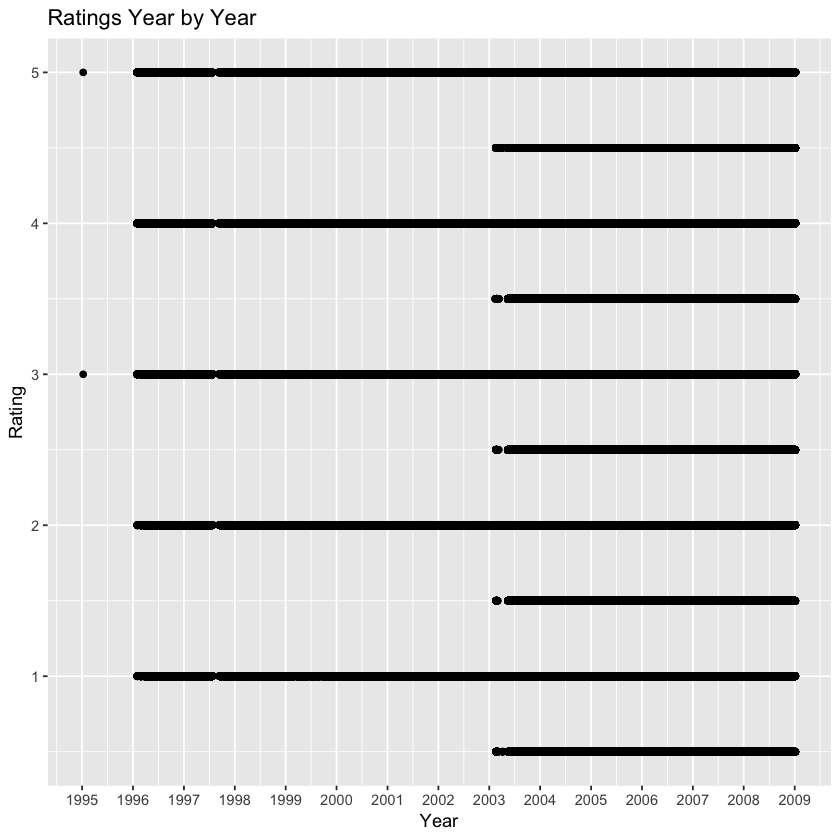

In [6]:
# What are the ratings year by year?
# Note: This process could take several minutes

edx_year_rating <- edx %>% 
    transform (date = as.Date(as.POSIXlt(timestamp, origin = "1970-01-01", format = "%Y-%m-%d"), format = "%Y-%m-%d")) %>%
    mutate (year_month = format(as.Date(date), "%Y-%m"))

ggplot(edx_year_rating) + 
    geom_point(aes(x = date, y = rating)) +
    scale_x_date(date_labels = "%Y", date_breaks  = "1 year") +
    labs(title = "Ratings Year by Year", x = "Year", y = "Rating")

We have only one rating in 1995 and more interestingly, no half-star rating was provided before 2003.

Let's keep in mind that the MovieLens datasets were collected over various periods of time and specifically, the MovieLens 1M dataset was released in February 2003. The MovieLens 10M dataset was released in January 2009.

Further investigation confirms that the half-star rating had been implemented from 18 February 2003.

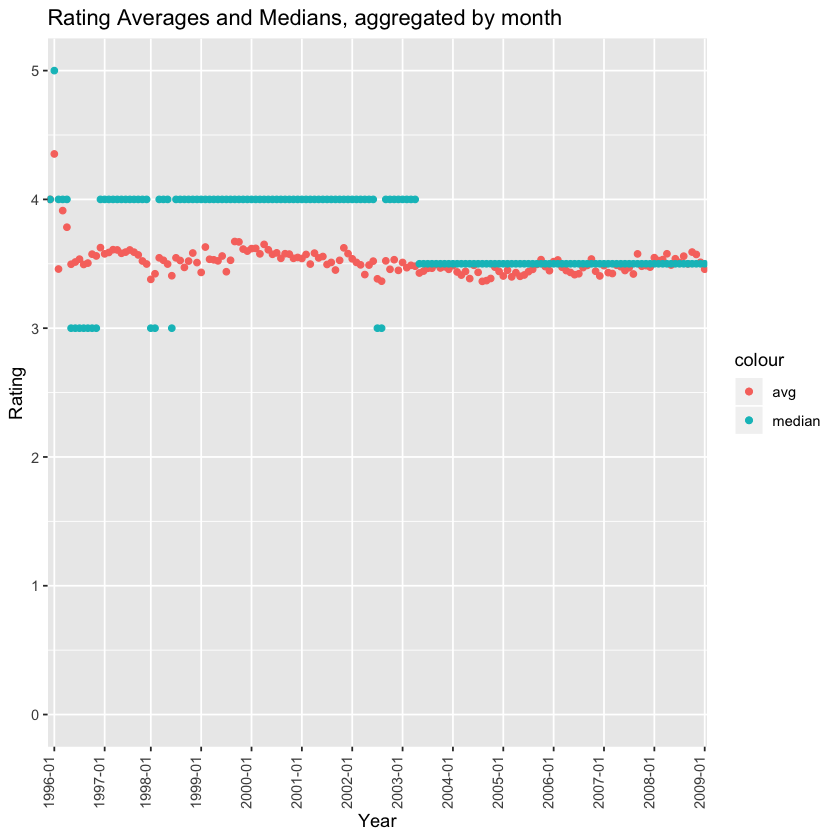

In [7]:
# What are the rating averages and medians year by year?

edx_yearmonth_rating <- edx_year_rating %>%
    group_by(year_month) %>%
    summarize(avg = mean(rating), median = median(rating))

ggplot(edx_yearmonth_rating) + 
    geom_point(aes(x = year_month, y = avg, colour = "avg")) +
    geom_point(aes(x = year_month, y = median, colour = "median")) +
    ylim(0, 5) +
    scale_x_discrete(breaks = c("1996-01", "1997-01", "1997-01", "1998-01", "1999-01", 
                                "2000-01", "2001-01", "2002-01", "2003-01", "2004-01", 
                                "2005-01", "2006-01", "2007-01", "2008-01", "2009-01")) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0)) +
    labs(title = "Rating Averages and Medians, aggregated by month ", x = "Year", y = "Rating") 

Only one month (January) record for 1995.

While the rating averages are rather consistent over the whole dataset, the medians are distributed between 3 and 4 stars until beginning of 2003 and changed to 3.5 stars afterwards. 

We may also note that the distribution of averages looks noisier between 1998 and 2000.

In [8]:
# Clean up memory
rm(edx_year_rating, edx_yearmonth_rating)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11598778,619.5,19138902,1022.2,25437946,1358.6
Vcells,91300710,696.6,415744300,3171.9,518721523,3957.6


In [9]:
# --- EXPLORING USERS ---------------------------------------

edx_users <- edx %>%
    group_by(userId) %>%
    summarize(count = n()) %>%
    arrange(desc(count))

summary(edx_users$count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   10.0    32.0    62.0   128.8   141.0  6616.0 

In [10]:
cat("The most active user(s) rated", max(edx_users$count), "movies and the least active user(s) rated", min(edx_users$count), "movies.\n")
cat("In average, an user rated about", round(mean(edx_users$count)), "movies, and the median is", median(edx_users$count), "movies.")

The most active user(s) rated 6616 movies and the least active user(s) rated 10 movies.
In average, an user rated about 129 movies, and the median is 62 movies.

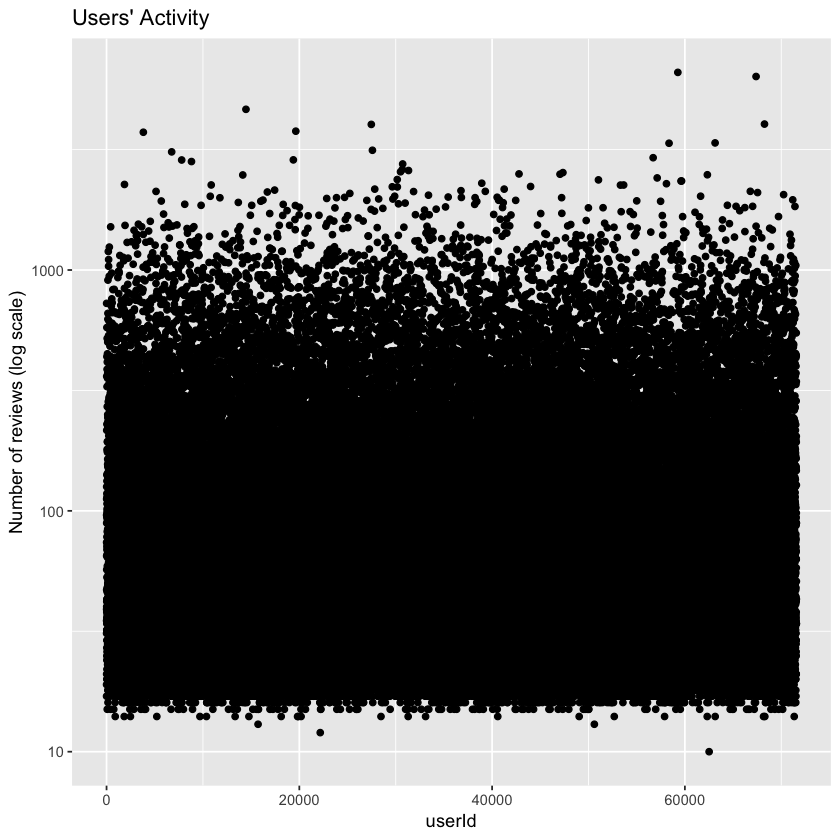

In [11]:
ggplot(edx_users) +
        geom_point(aes(x = userId, y = count)) +
        scale_y_log10() +
        labs(title = "Users' Activity", x = "userId", y = "Number of reviews (log scale)")        

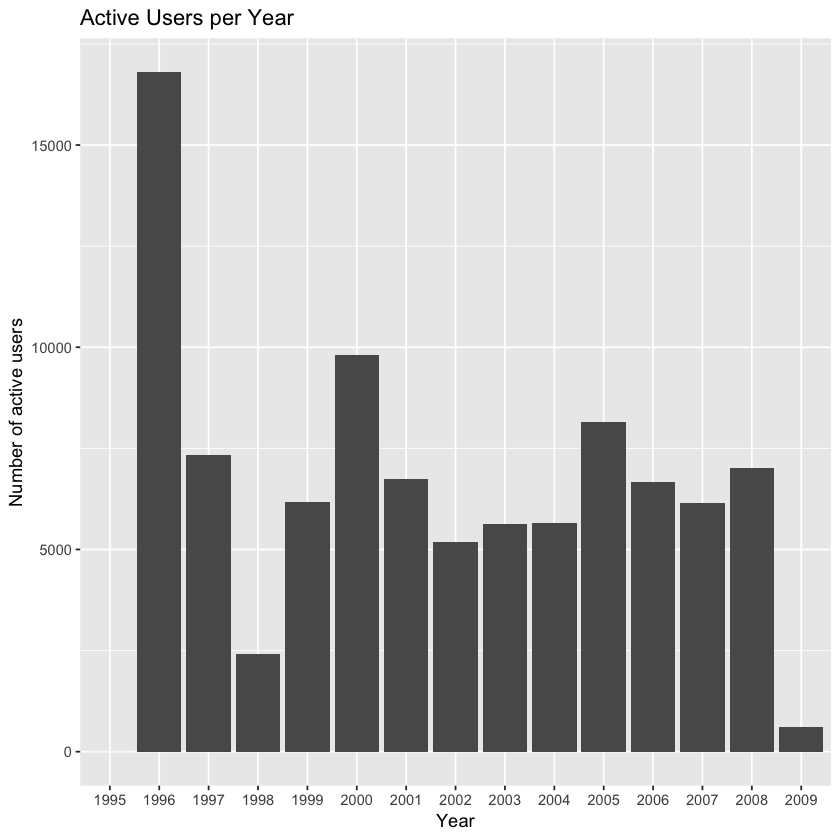

In [12]:
# How many active users do we have per year?

users_year <- edx %>%
    transform(timestamp = format(as.POSIXlt(timestamp, origin = "1970-01-01"), "%Y")) %>%
    select(timestamp, userId) %>%
    group_by(timestamp) %>%
    summarise(count = n_distinct(userId))
              
ggplot(data = users_year, aes(x = timestamp, y = count)) +
    geom_bar(stat = "identity") + 
    labs(title = "Active Users per Year", x = "Year", y = "Number of active users")

1996 is the year with the largest number of active users and 1998 the year with the smallest number (less than 2,500 active users). 1995 and 2009 are not full years.

In [13]:
# How many reviews do we have for the most active users?

user_year_rating <-edx %>%
    transform(timestamp = format(as.POSIXlt(timestamp, origin = "1970-01-01"), "%Y")) %>%
    group_by(timestamp, userId) %>%
    summarise(count = n()) %>%
    arrange(desc(count))

summary(user_year_rating$count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   26.00   51.00   95.42  110.00 4648.00 

There is one user who rated 4,648 movies in a year. What a commitment! 

In [14]:
# Let's see further about high counts of reviews given

head(user_year_rating)

timestamp,userId,count
2002,14463,4648
2007,67385,4233
2002,7795,2799
2006,3817,2731
2001,59269,2610
2007,58357,2588


Some users provided a very large number of reviews in a year. For example, userId 14463 rated 4,648 movies in 2002 (only). This, by the way, confirms that the timestamp is the time when the movie is rated, not when it is watched.  

In [15]:
# Let's see further about userId 14463.

userId_14463 <- edx %>% 
    filter(userId == 14463) %>%
    summarize(count = n(), avg = mean(rating), median = median(rating), std = sd(rating), max = max(rating), min = min(rating))
    
userId_14463

count,avg,median,std,max,min
4648,2.403614,2,0.688186,5,1


With a median rating of 2 stars, userId 14463 didn't like much the movies he/she rated. 

In [16]:
# --- Users' rating characteristics -------------------------

users_rating_char <- edx %>%
    group_by(userId) %>%
    summarize(count = n(), avg = mean(rating), median = median(rating), std = sd(rating)) %>%
    arrange(desc(count))

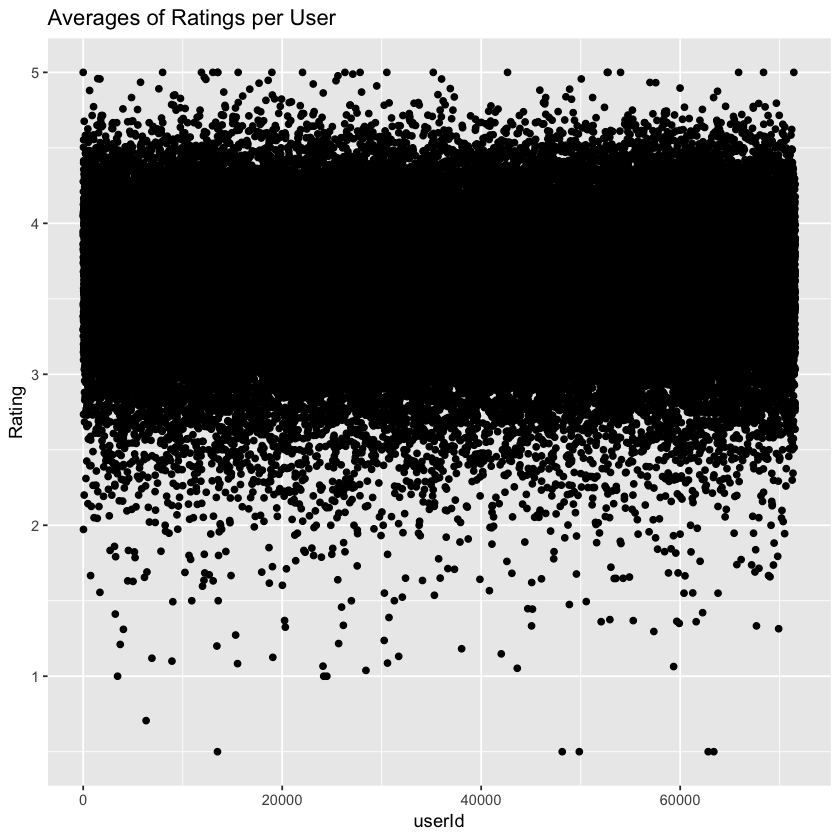

In [17]:
# What are the averages of ratings per user?
ggplot(users_rating_char) + 
    geom_point(aes(x = userId, y = avg)) +
    labs(title = "Averages of Ratings per User", x = "userId", y = "Rating")

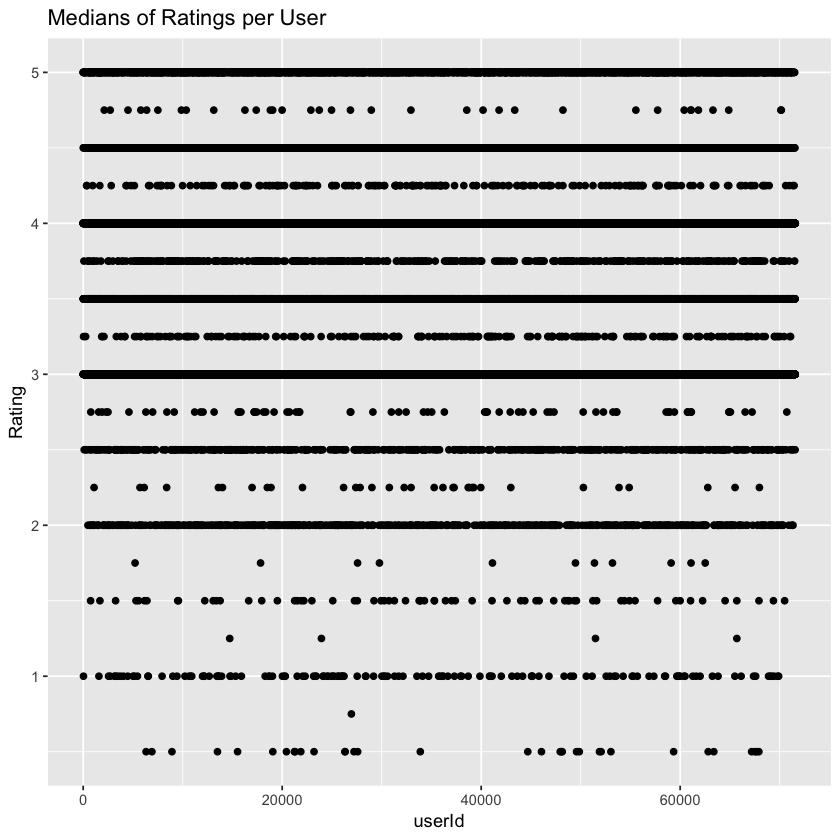

In [18]:
# What are the medians of ratings per user?
ggplot(users_rating_char) + 
    geom_point(aes(x = userId, y = median)) +
    labs(title = "Medians of Ratings per User ", x = "userId", y = "Rating")

Looking at the medians distribution, we may note that half-star ratings are less common than whole star ratings as before February 2003, the system didn't allow half-star scoring. 

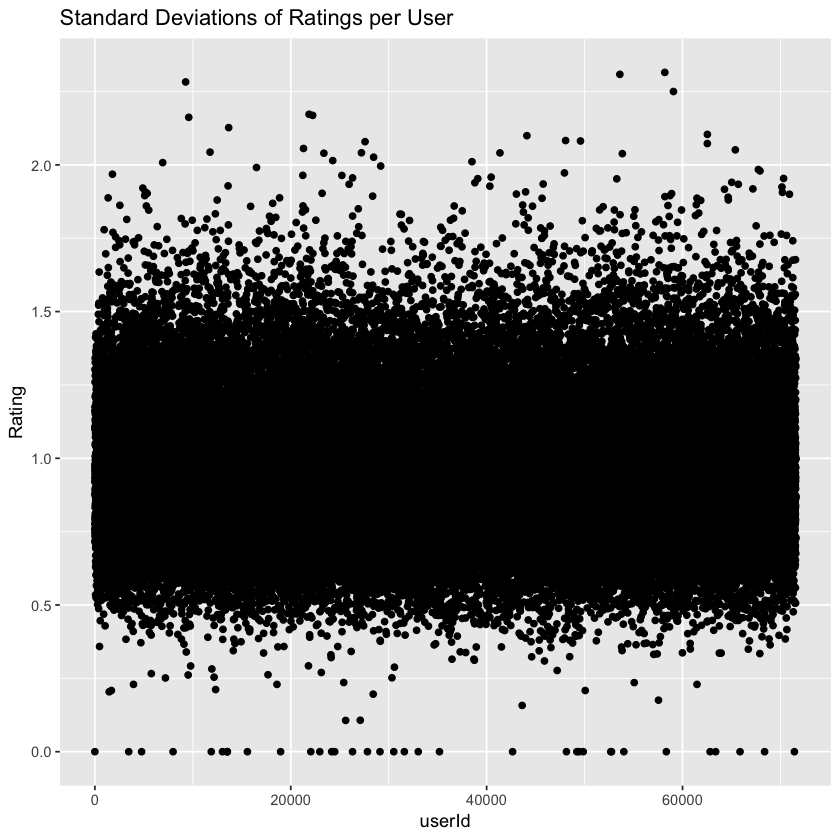

In [19]:
# What are the standard deviations of ratings per user?
ggplot(users_rating_char) + 
    geom_point(aes(x = userId, y = std)) +
    labs(title = "Standard Deviations of Ratings per User", x = "userId", y = "Rating")

We may note that some users always rated movies with the same score (standard deviation with zero value) while the vast majority clearly have preferences with a standard deviation ranging between 0.5 and 1.5 stars.
**It shows interactions between users and movies.**

In [20]:
# Clean up memory
rm(edx_users, users_year, user_year_rating, userId_14463, users_rating_char)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11612830,620.2,19138902,1022.2,25437946,1358.6
Vcells,91607360,699.0,332595440,2537.6,518721523,3957.6


In [21]:
# --- EXPLORING MOVIES --------------------------------------

edx_movies <- edx %>%
    group_by(movieId) %>%
    summarize(count = n()) %>%
    arrange(desc(count))

summary(edx_movies$count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    30.0   122.0   842.9   565.0 31362.0 

In [22]:
cat("The most reviewed movie(s) was(were) rated by", max(edx_movies$count), "users and the least reviewed one(s) was(were) rated by", min(edx_movies$count), "user.\n")
cat("A movie, in average, is rated about", round(mean(edx_movies$count)), "times, and the median is", median(edx_movies$count), "ratings.")

The most reviewed movie(s) was(were) rated by 31362 users and the least reviewed one(s) was(were) rated by 1 user.
A movie, in average, is rated about 843 times, and the median is 122 ratings.

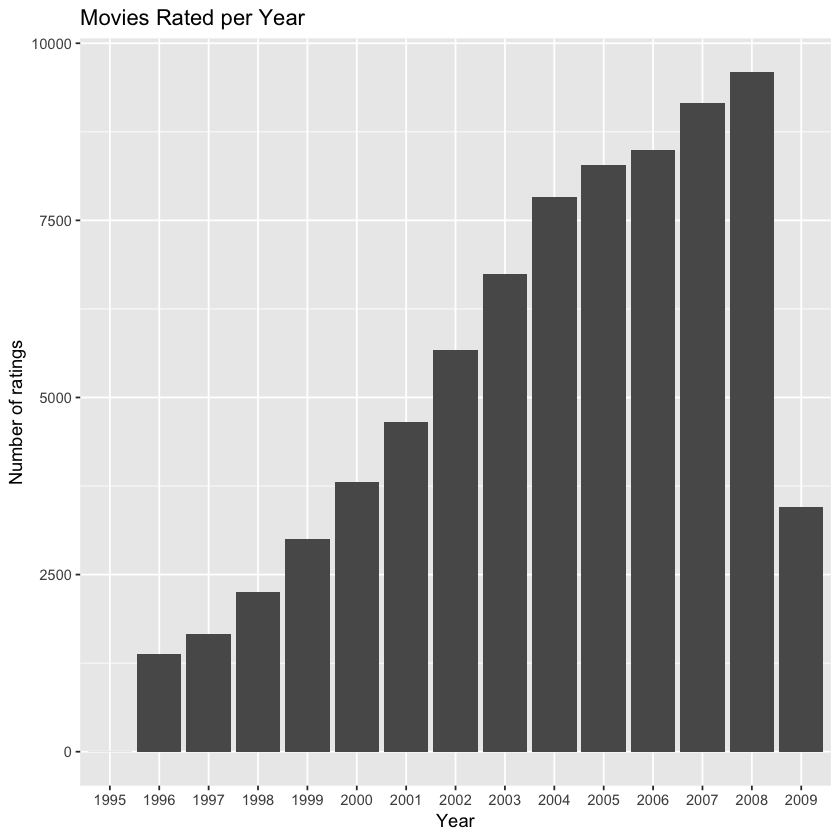

In [23]:
# How many movies are rated per year?

movies_year <- edx %>%
    transform(timestamp = format(as.POSIXlt(timestamp, origin = "1970-01-01"), "%Y")) %>%
    select(timestamp, movieId) %>%
    group_by(timestamp) %>%
    summarise(count = n_distinct(movieId))
              
ggplot(data = movies_year, aes(x = timestamp, y = count)) +
    geom_bar(stat = "identity") + 
    labs(title = "Movies Rated per Year", x = "Year", y = "Number of ratings")

Not surprisingly, we can see a clear growth of ratings, regardless of the number of active users, as more movies are referenced and available for review.

In [24]:
# What are the most reviewed movies? 
movies_votes <- edx %>%
    group_by(movieId, title) %>%
    summarize(count = n()) %>%
    arrange(desc(count))

head(movies_votes)

movieId,title,count
296,Pulp Fiction (1994),31362
356,Forrest Gump (1994),31079
593,"Silence of the Lambs, The (1991)",30382
480,Jurassic Park (1993),29360
318,"Shawshank Redemption, The (1994)",28015
110,Braveheart (1995),26212


**Pulp Fiction**, **Forest Gump**, and **The Silence of the Lambs** are the three most reviewed movies. 

In [25]:
# What are the most popular movies? 

# Best movies (by ratings average and with a minimum of 1,000 ratings)
top_movies <- edx %>%
    group_by(movieId, title) %>%
    filter(n() >= 1000) %>%
    summarise(count = n(), avg = mean(rating), median = median(rating), min = min(rating), max = max(rating)) %>%
    arrange(desc(avg))

head(top_movies)

movieId,title,count,avg,median,min,max
318,"Shawshank Redemption, The (1994)",28015,4.455131,5.0,0.5,5
858,"Godfather, The (1972)",17747,4.415366,5.0,0.5,5
50,"Usual Suspects, The (1995)",21648,4.365854,4.5,0.5,5
527,Schindler's List (1993),23193,4.363493,4.5,0.5,5
912,Casablanca (1942),11232,4.320424,4.5,0.5,5
904,Rear Window (1954),7935,4.318652,4.5,0.5,5


We note a high variation in these counts of reviews, e.g. **The Shawshank Redemption** has about 10,000 more reviews than **The Godfather** (28,015 reviews vs 17,747 reviews, respectively). 

So when we sort by average score, the ranking will be "polluted" by movies with low count of reviews. To deal with this issue we can use a weighted average as used on the IMDB website for their Top 250 ranking. To take this bias into account, we can use the weighted rating as follows:

In [26]:
# R = average of the movie ratings
# v = number of ratings for the movie 
# m = minimum ratings required to be listed in the Top movies
# C = the mean rating across the whole dataset

wr <- function(R, v, m, C) {
  return (v/(v+m))*R + (m/(v+m))*C
}

new_top_movies <- edx %>%
    group_by(movieId, title) %>%
    summarise(count = n(), avg = mean(rating)) %>%
    mutate(weighted_rating = wr(avg, count, 1000, mean(avg))) %>%
    arrange(desc(weighted_rating))

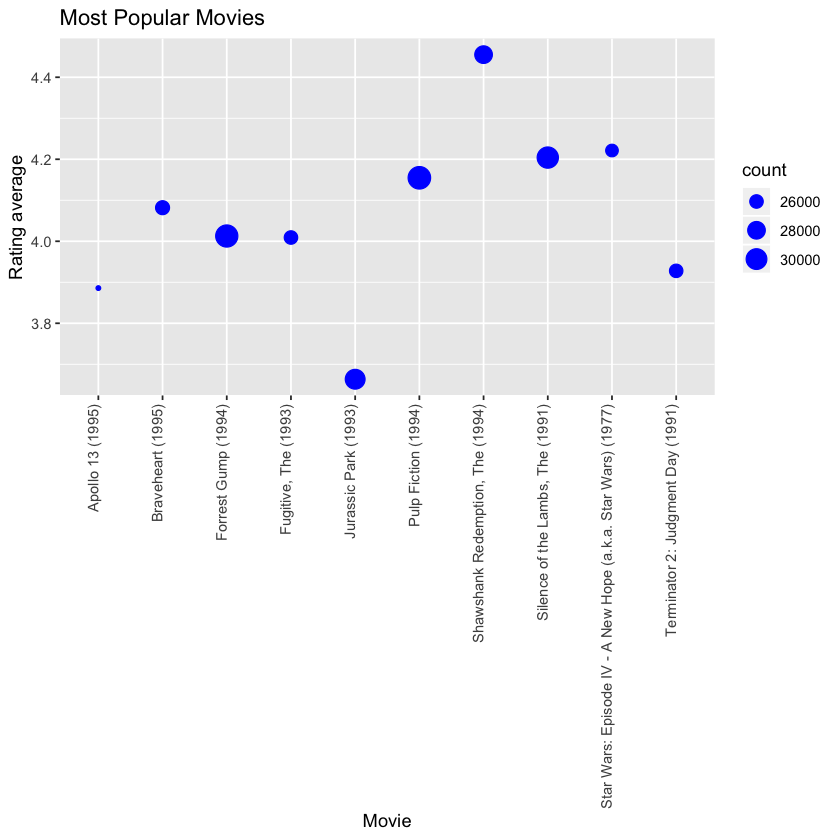

In [27]:
# Top 10 popular movies

top10_movies <- new_top_movies %>% select(movieId, title, count, avg) %>% head(10)

ggplot(data = top10_movies, aes(x = title, y = avg)) +
    geom_point(aes(size = count),color = "blue") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust=0)) +
    labs(title = "Most Popular Movies", x = "Movie", y = "Rating average")

If we consider popularity as the quality of being liked by a large number of people, we want to consider movies that are highly rated by a large number of users.

In [28]:
head(new_top_movies, 10)

movieId,title,count,avg,weighted_rating
296,Pulp Fiction (1994),31362,4.154789,0.9690996
356,Forrest Gump (1994),31079,4.012822,0.9688270
593,"Silence of the Lambs, The (1991)",30382,4.204101,0.9681346
480,Jurassic Park (1993),29360,3.663522,0.9670619
318,"Shawshank Redemption, The (1994)",28015,4.455131,0.9655351
110,Braveheart (1995),26212,4.081852,0.9632515
457,"Fugitive, The (1993)",25998,4.009155,0.9629602
589,Terminator 2: Judgment Day (1991),25984,3.927859,0.9629410
260,Star Wars: Episode IV - A New Hope (a.k.a. Star Wars) (1977),25672,4.221311,0.9625075
150,Apollo 13 (1995),24284,3.885789,0.9604493


**Pulp Fiction**, **Forrest Gump**, and **The Silence of the Lambs** are the 3 most popular movies.

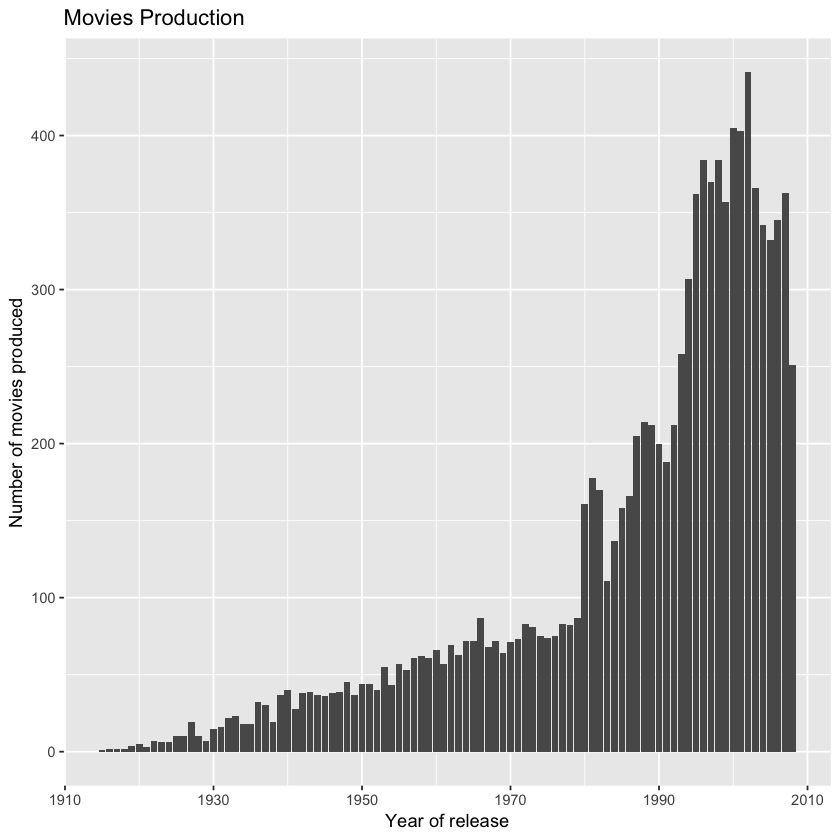

In [29]:
# How many movies are produced per year?

# Extract the year of release from the movie title
title_year <- edx %>%
  mutate(title = str_trim(title)) %>% # trim whitespaces
  extract(title, c("title", "year"), regex = "^(.*) \\(([0-9 \\-]*)\\)$", remove = T, convert = T) # split title to title, year
 
# Number of movies produced per year
movies_title_year <- title_year %>%
    select(year, movieId) %>%
    group_by(year) %>%
    summarise(count = n_distinct(movieId)) %>%
    arrange(desc(count))

ggplot(data = movies_title_year, aes(x = year, y = count)) + 
            geom_bar(stat = "identity") + 
            labs(title = "Movies Production", x = "Year of release", y = "Number of movies produced")

In our data, we can see an exponential growth until 2002 and then a trend drop. The latter could be caused by the fact that the data is collected until 2009 (not a full year) so we have less new movies referenced in the dataset. As for the former, maybe it is somewhat linked to the beginning of the Internet era, implying a growing popularity of the demand for movies online. 

In [30]:
# What are the most rated movie genres?
# Note: This process could take several minutes

movies_genre <- edx %>%
    separate_rows(genres, sep = "\\|")

genres_ratings <- movies_genre %>% # Separate the combined genre categories into single genres
    group_by(genres) %>%
    summarise(count = n()) %>%
    arrange(desc(count))

genres_ratings 

genres,count
Drama,3910127
Comedy,3540930
Action,2560545
Thriller,2325899
Adventure,1908892
Romance,1712100
Sci-Fi,1341183
Crime,1327715
Fantasy,925637
Children,737994


Not surprisingly, the top 3 rated genres are **Drama**, **Comedy**, and **Action**.

In [31]:
movies_genre %>% filter(genres == "(no genres listed)")

userId,movieId,rating,timestamp,title,genres
7701,8606,5.0,1190806786,Pull My Daisy (1958),(no genres listed)
10680,8606,4.5,1171170472,Pull My Daisy (1958),(no genres listed)
29097,8606,2.0,1089648625,Pull My Daisy (1958),(no genres listed)
46142,8606,3.5,1226518191,Pull My Daisy (1958),(no genres listed)
57696,8606,4.5,1230588636,Pull My Daisy (1958),(no genres listed)
64411,8606,3.5,1096732843,Pull My Daisy (1958),(no genres listed)
67385,8606,2.5,1188277325,Pull My Daisy (1958),(no genres listed)


Note: The movie **Pull My Daisy (1958)** (which is rated by 7 users) has no genre listed.

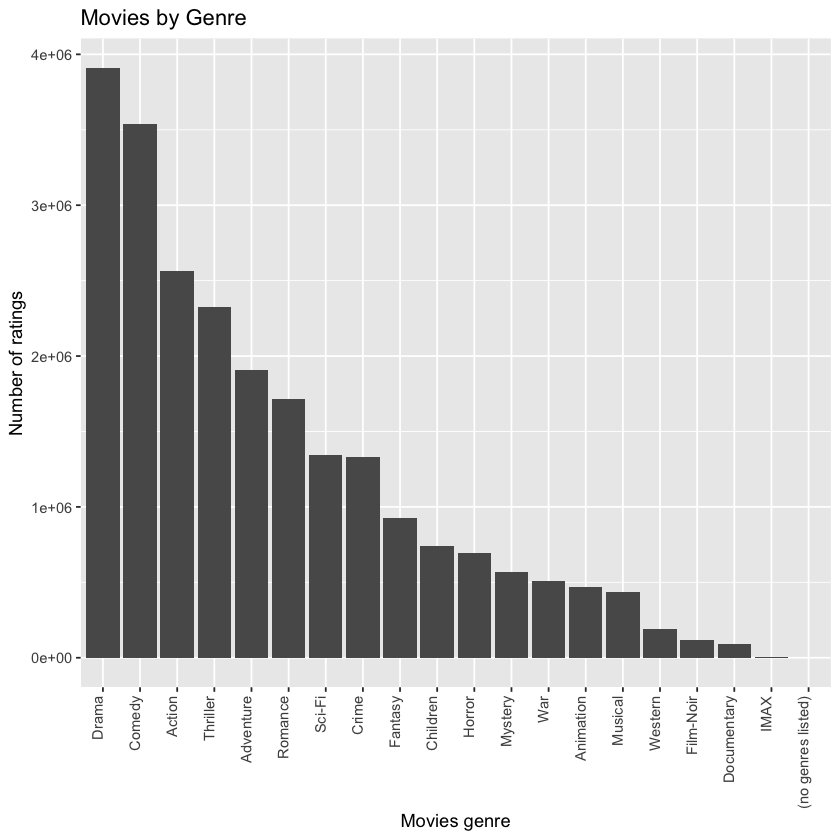

In [32]:
ggplot(data = genres_ratings, aes(x = reorder(genres, -count), y = count)) +
        geom_bar(stat = "identity") + 
        theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0)) +
        labs(title = "Movies by Genre", x = "Movies genre", y = "Number of ratings")

In [33]:
# What are the most popular genres? 

# Best genres (by ratings average)
top_genres <- movies_genre %>%
  group_by(genres) %>%
  summarise(count = n(), avg = mean(rating)) %>%
  arrange(desc(avg))

top_genres

genres,count,avg
Film-Noir,118541,4.011625
Documentary,93066,3.783487
War,511147,3.780813
IMAX,8181,3.767693
Mystery,568332,3.677001
Drama,3910127,3.673131
Crime,1327715,3.665925
(no genres listed),7,3.642857
Animation,467168,3.600644
Musical,433080,3.563305


The top 3 most liked genres are **Film-Noir**, **Documentary**, and **War**. However, these genres are not often reviewed, so the ranking is not representative of the popularity of the genre. We can use a weighted average to take this bias into account.

In [34]:
# R = average of the movie ratings
# v = number of ratings for the movie 
# m = minimum ratings required to be listed in the Top movies
# C = the mean rating across the whole dataset

wr <- function(R, v, m, C) {
  return (v/(v+m))*R + (m/(v+m))*C
}

new_top_genres <- movies_genre %>%
    group_by(genres) %>%
    summarise(count = n(), avg = mean(rating)) %>%
    mutate(weighted_rating = wr(avg, count, 1000, mean(avg))) %>%
    arrange(desc(weighted_rating))

new_top_genres

genres,count,avg,weighted_rating
Drama,3910127,3.673131,0.999744319
Comedy,3540930,3.436908,0.999717668
Action,2560545,3.421405,0.999609611
Thriller,2325899,3.507676,0.999570243
Adventure,1908892,3.493544,0.999476410
Romance,1712100,3.553813,0.999416263
Sci-Fi,1341183,3.395743,0.999254945
Crime,1327715,3.665925,0.999247393
Fantasy,925637,3.501946,0.998920829
Children,737994,3.418715,0.998646809


So, the 3 most popular genres, when considering the count of reviews as well, are confirmed to be **Drama**, **Comedy**, and **Action**.

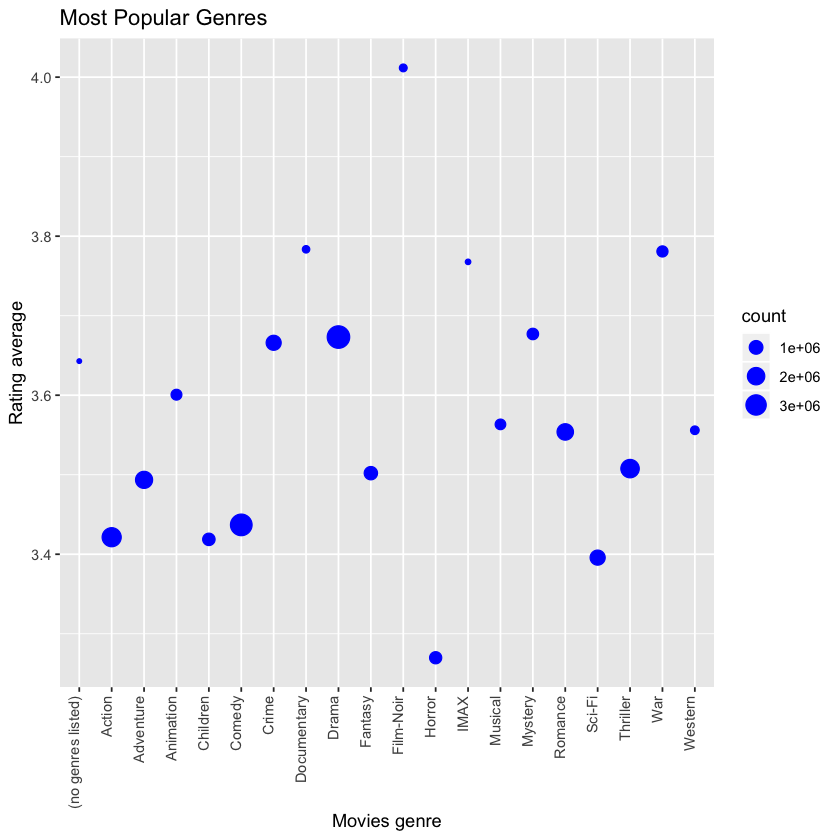

In [35]:
# Most popular genres
ggplot(data = new_top_genres, aes(x = genres, y = avg)) +
    geom_point(aes(size = count),color = "blue") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust=0)) +
    labs(title = "Most Popular Genres", x = "Movies genre", y = "Rating average")

We note that the top 4 most highly rated genres are not very popular. One reason would be that users who rate these genres are rather the aficionados. 

In [36]:
# Clean up memory
rm(edx_movies, movies_year, movies_votes, top_movies, wr, new_top_movies, top10_movies, 
   title_year, movies_title_year, 
   movies_genre, genres_ratings, top_genres, new_top_genres) 
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11618820,620.6,48539288,2592.3,37024444,1977.4
Vcells,91342821,696.9,385640714,2942.3,518721523,3957.6


In [37]:
# --- EXPLORING RATINGS -------------------------------------

summary(edx$rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.500   3.000   4.000   3.512   4.000   5.000 

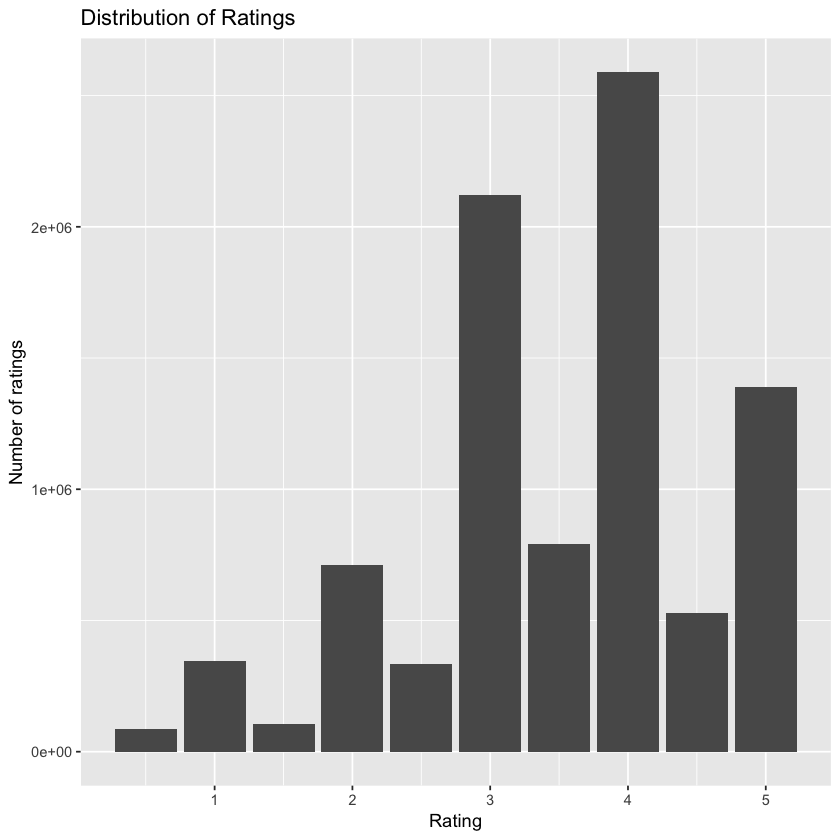

In [38]:
# Distribution of ratings
ggplot(data = edx, aes(x = rating)) +
    geom_bar() + 
    labs(title = "Distribution of Ratings", x = "Rating", y = "Number of ratings")

In [39]:
# How do the ratings distributions compare before and after half-star scores are allowed?
# The half-star rating has been implemented from 18 February 2003 (timestamp = 1045526400

edx_before <- subset(edx, timestamp < 1045526400)
edx_after <- subset(edx, timestamp >= 1045526400)

In [40]:
# Numbers of rows before and after 18 Feb 2003
cat("There are", nrow(edx_before), "ratings before 18 Feb 2003, without half-star scoring and", nrow(edx_after), "ratings after 18 Feb 2003, with half-star scoring.")

There are 4702794 ratings before 18 Feb 2003, without half-star scoring and 4297261 ratings after 18 Feb 2003, with half-star scoring.

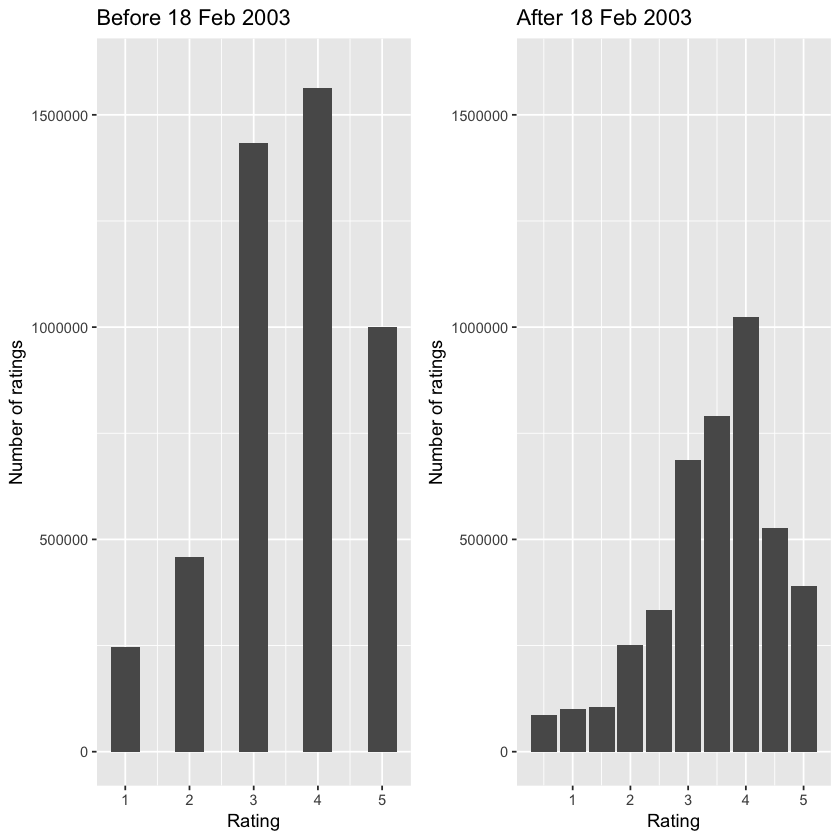

In [41]:
# Distribution of ratings before 2003-02-18 (timestamp = 1045526400)
pbef <- ggplot(data=edx_before, aes(x = rating)) + 
    geom_bar() + 
    ylim(0, 1600000) +
    labs(title = "Before 18 Feb 2003", x = "Rating", y = "Number of ratings")

# Distribution of ratings after 2003-02-18 (timestamp = 1045526400)
paft <- ggplot(data = edx_after, aes(x = rating)) +
    geom_bar() + 
    ylim(0, 1600000) +
    labs(title = "After 18 Feb 2003", x = "Rating", y = "Number of ratings")

grid.arrange(pbef, paft, ncol = 2)

In [42]:
# Ratings per year
edx_year_rating <- edx %>% transform(timestamp = format(as.POSIXlt(timestamp, origin = "1970-01-01"), "%Y"))

# Number of distinct users per year
users_year <- edx_year_rating %>%
    select(timestamp, userId) %>%
    group_by(timestamp) %>%
    summarise(count_users = n_distinct(userId)) %>%
    arrange(timestamp)
              
# Number of ratings per year
ratings_year <- edx_year_rating %>%
    select(timestamp, rating) %>%
    group_by(timestamp) %>%
    summarise(count_ratings = n()) %>%
    arrange(timestamp)
              
rates <- users_year %>% 
    left_join(ratings_year) %>%
    mutate(rate = count_ratings / count_users)

Joining, by = "timestamp"


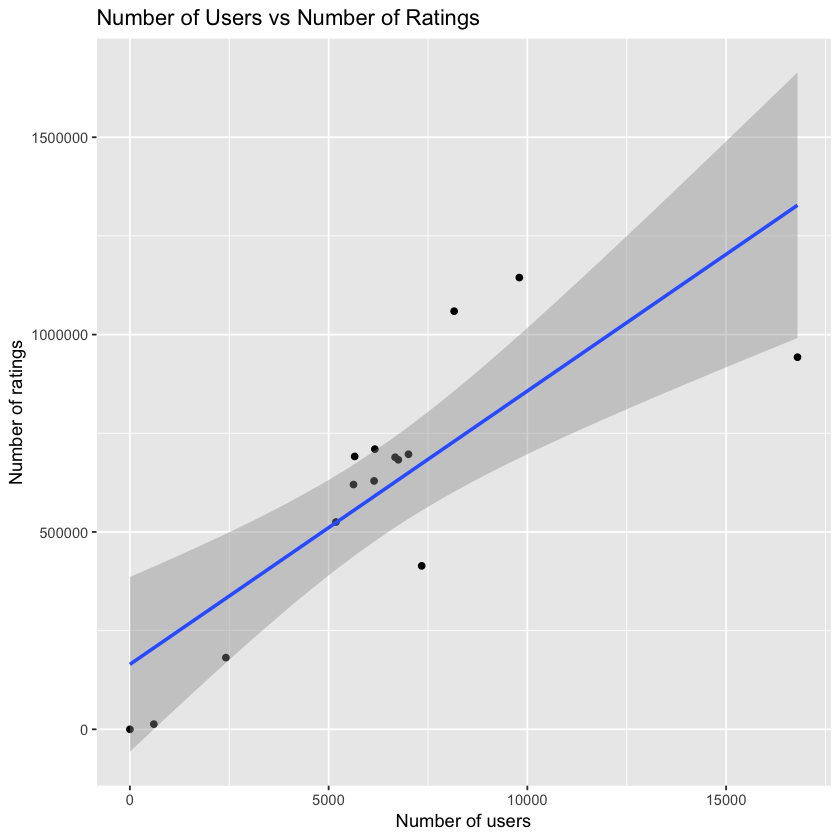

In [43]:
ggplot(data = rates, aes(x = count_users, y = count_ratings)) + 
                geom_point() + 
                geom_smooth(method = "lm") +
                labs(title = "Number of Users vs Number of Ratings", x = "Number of users", y = "Number of ratings")

Not surprisingly, the number of users is correlated with the number of ratings.

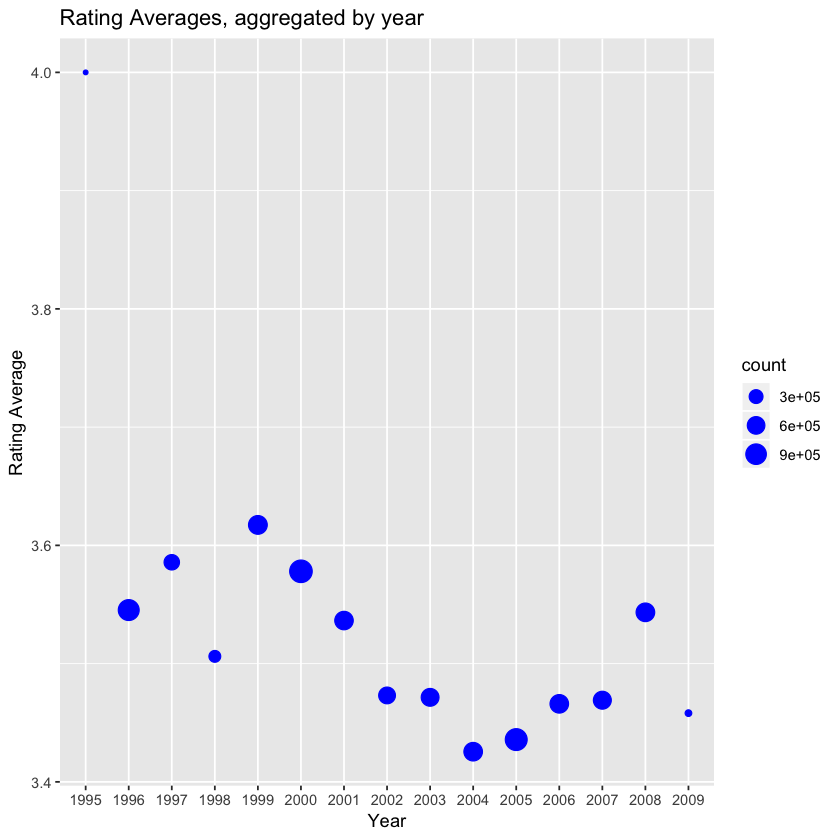

In [44]:
# Ratings average per year

avg_rating_year <- edx_year_rating %>%
  group_by(timestamp) %>%
  summarise(count = n(), average = mean(rating), std = sd(rating), median = median(rating), min = min(rating), max = max(rating)) %>%
  arrange(desc(average))

ggplot(data = avg_rating_year, aes(x = timestamp, y = average)) +
                geom_point(aes(size = count),color = "blue") +
                labs(title = "Rating Averages, aggregated by year", x = "Year", y = "Rating Average")

As seen earlier, rating averages are rather consistent, between 3.4 and 3.6 stars. The average in 1995, with only one rating, can be considered as an outlier.

In [45]:
# Clean up memory
rm(edx_before, edx_after, pbef, paft,
   edx_year_rating, users_year, ratings_year, rates, avg_rating_year)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11640098,621.7,38831430,2073.9,37024444,1977.4
Vcells,91378395,697.2,308512571,2353.8,518721523,3957.6


### Predictive Model

In [46]:
# --- USED LIBRARIES ----------------------------------------

if(!require(knitr)) install.packages("knitr", repos = "http://cran.us.r-project.org")
# if(!require(e1071)) install.packages("e1071", repos = "http://cran.r-project.org")

Loading required package: knitr


In [47]:
# --- SPLIT TRAIN/TEST SETS ---------------------------------

set.seed(699)
test_index <- createDataPartition(y = edx$rating, times = 1, p = 0.2, list = FALSE)
train_set <- edx[-test_index,]
test_set <- edx[test_index,]

# Use semi_join() to ensure that all users and movies in the test set are also in the training set
test_set <- test_set %>% 
  semi_join(train_set, by = "movieId") %>%
  semi_join(train_set, by = "userId")

The average rating of all movies across all users is: 3.512453

The RMSE with just the average method is: 1.060247

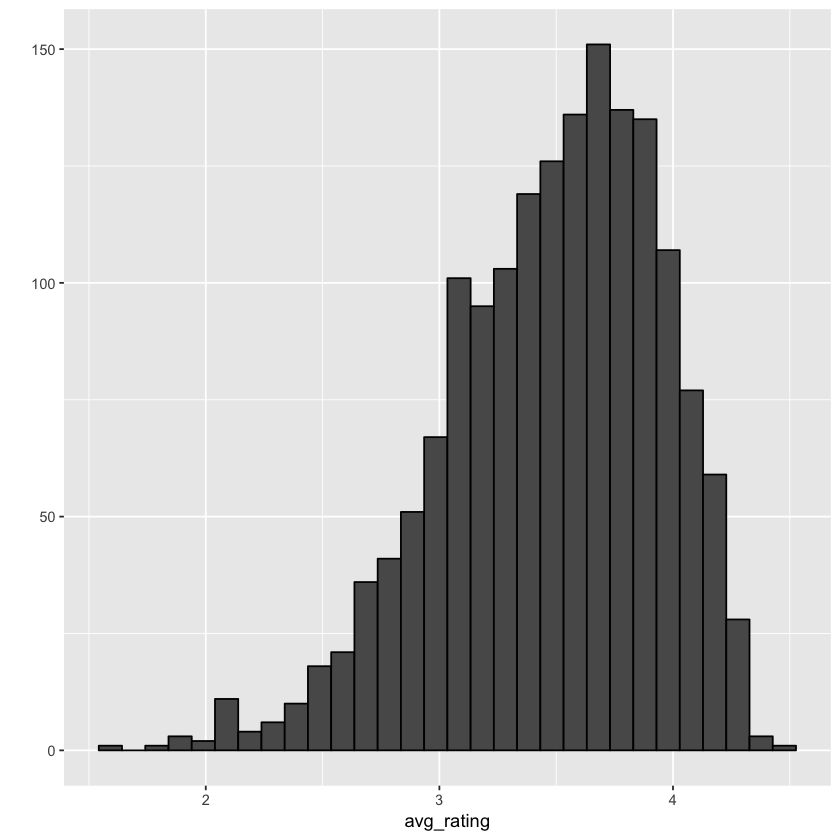

In [48]:
# --- MODELING WITH JUST THE AVERAGE ------------------------

# RMSE as loss function, which computes the errors between ratings and predicted ratings.
RMSE <- function(true_ratings, predicted_ratings){
  sqrt(mean((true_ratings - predicted_ratings)^2))
}

# The estimate here that minimizes the RMSE is just the average rating of all movies across all users.
# We compute this average on the training data...
mu <- mean(train_set$rating)
cat("The average rating of all movies across all users is:", mu)

# Let's plot the average rating for movies that are rated at least 1000 times.
train_set %>% group_by(movieId) %>% 
  filter(n()>=1000) %>% 
  summarize(avg_rating = mean(rating)) %>% 
  qplot(avg_rating, geom = "histogram", color = I("black"), bins=30, data = .)

# ...and we predict all unknown ratings with this average.
predictions <- rep(mu, nrow(test_set))

# Then we compute the RMSE.
naive_rmse <- RMSE(test_set$rating, predictions)
cat("The RMSE with just the average method is:", naive_rmse)



|method             |      RMSE|
|:------------------|---------:|
|Just the average   | 1.0602472|
|Movie effect model | 0.9435966|

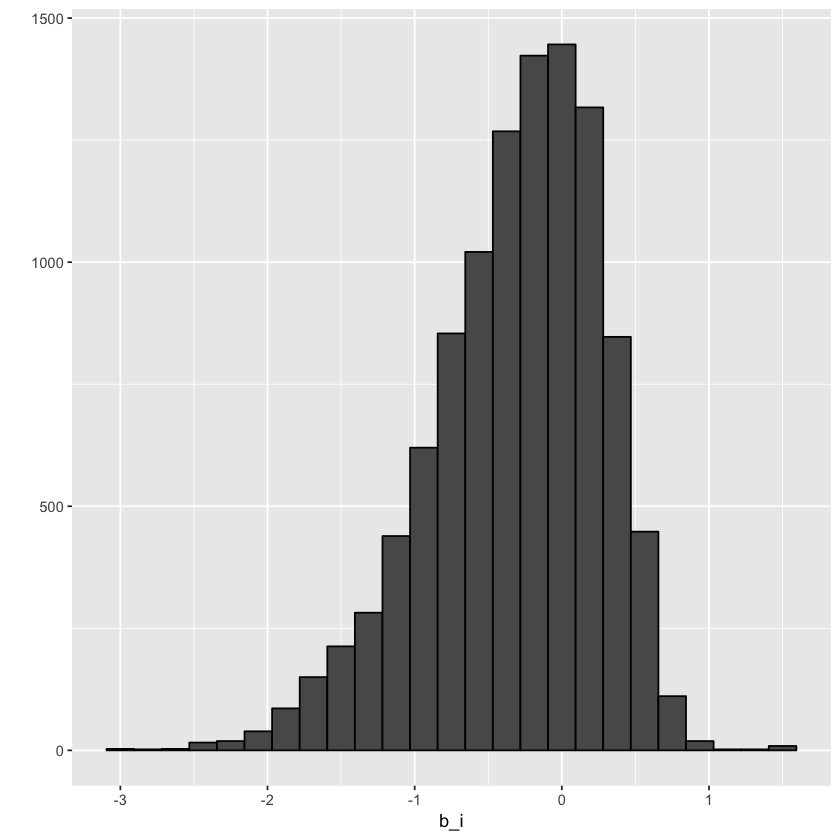

In [49]:
# --- MODELING MOVIE EFFECT ---------------------------------

# Create a table that's going to store the results that we obtain as we're goinng to compare different effects.
rmse_results <- data_frame(method = "Just the average", RMSE = naive_rmse)

movie_means <- train_set %>% 
  group_by(movieId) %>% 
  summarize(b_i = mean(rating - mu))

qplot(b_i, geom = "histogram", color = I("black"), bins=25, data = movie_means)

joined <- test_set %>% 
  left_join(movie_means, by='movieId')

# Note that as we ensured above that all users and movies in the test set are also in the training set,
# we don't need to handle NAs with the left_join()

predicted_ratings <- mu + joined$b_i

model1_rmse <- RMSE(predicted_ratings, test_set$rating)

rmse_results <- bind_rows(rmse_results,
                          data_frame(method = "Movie effect model",  
                                     RMSE = model1_rmse ))
rmse_results %>% kable

The best lambda (which minimizes the RMSE) for the movie effect is: 2.75

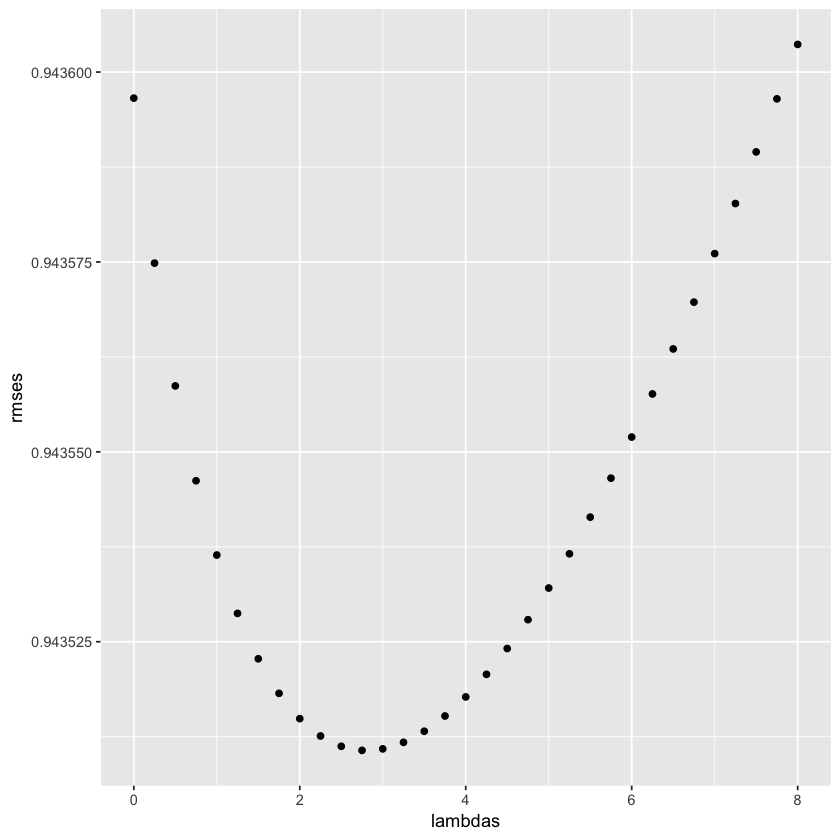

In [50]:
# --- REGULARIZATION OF THE MOVIE EFFECT --------------------

# The largest movie effects are with movies that have few ratings. 
# So, we use regularization to penalize large estimates that come from small sample sizes.

# Compute regularized estimates of b_i using lambda (penalty term). Let's first try a few values of lambda and pick the best one.
lambdas <- seq(0, 8, 0.25)

tmp <- train_set %>% 
  group_by(movieId) %>% 
  summarize(sum = sum(rating - mu), n_i = n())

rmses <- sapply(lambdas, function(l){
  joined <- test_set %>% 
    left_join(tmp, by='movieId') %>% 
    mutate(b_i = sum/(n_i+l))
    predicted_ratings <- mu + joined$b_i
    return(RMSE(predicted_ratings, test_set$rating))
})

cat("The best lambda (which minimizes the RMSE) for the movie effect is:", lambdas[which.min(rmses)])

qplot(lambdas, rmses)  


In [51]:
# So it looks like a value of lambda = 2.75 gives us the smallest RMSE

lambda <- 2.75

movie_reg_means <- train_set %>% 
  group_by(movieId) %>% 
  summarize(b_i = sum(rating - mu)/(n()+lambda), n_i = n()) 

joined <- test_set %>% 
  left_join(movie_reg_means, by='movieId') %>% 
  replace_na(list(b_i=0))

predicted_ratings <- mu + joined$b_i

model1_reg_rmse <- RMSE(predicted_ratings, test_set$rating)

rmse_results <- bind_rows(rmse_results,
                          data_frame(method = "Regularized movie effect model, lambda = 2.75",  
                                     RMSE = model1_reg_rmse ))
rmse_results %>% kable



|method                                        |      RMSE|
|:---------------------------------------------|---------:|
|Just the average                              | 1.0602472|
|Movie effect model                            | 0.9435966|
|Regularized movie effect model, lambda = 2.75 | 0.9435107|

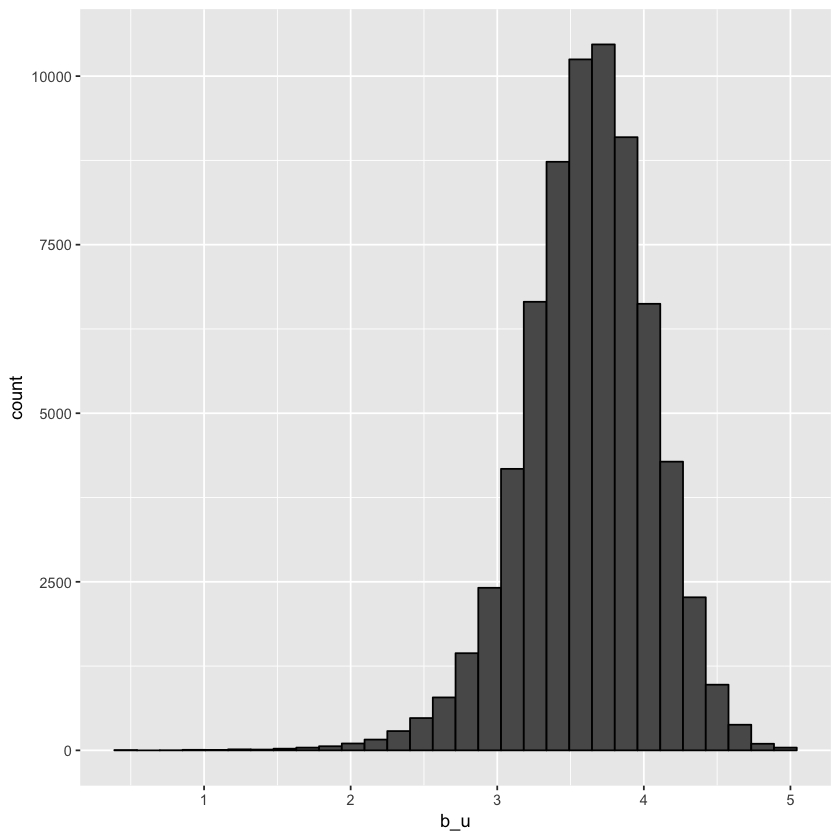

In [53]:
# --- MODELING USER AND MOVIE EFFECTS ----------------------------------

# Let's plot the average rating for users who have rated at least 100 movies
train_set %>% 
  group_by(userId) %>% 
  summarize(b_u = mean(rating)) %>% 
  filter(n() >= 100) %>%
  ggplot(aes(b_u)) + 
  geom_histogram(bins = 30, color  = "black")

The best lambda_2 (which minimizes the RMSE) for the user and movie effects is 5

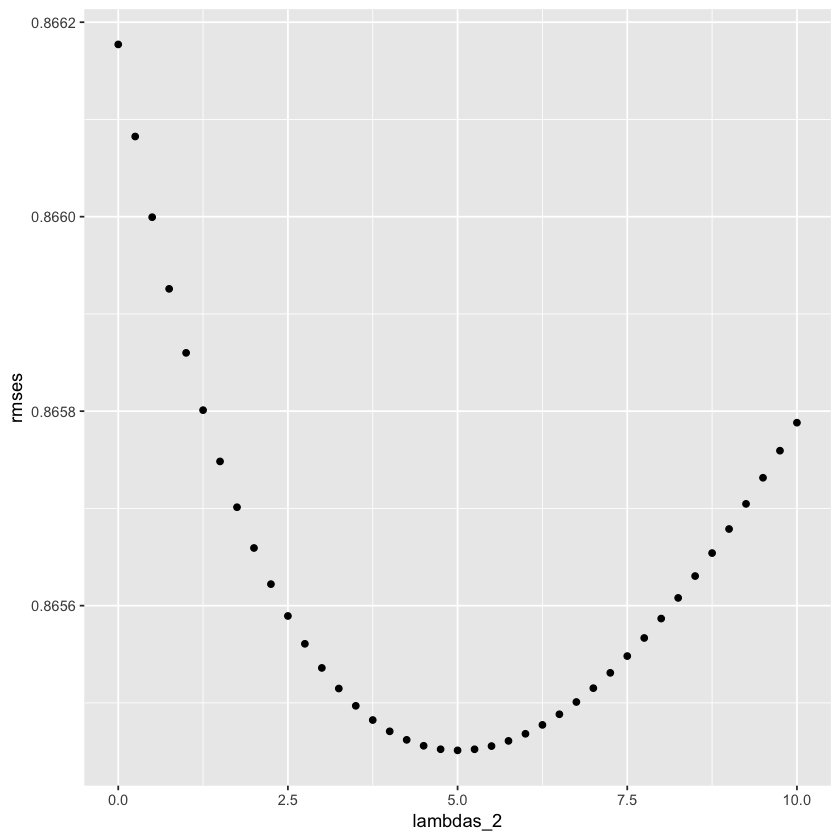

In [54]:
# As with the movies, the largest user effect are for those that rate few movies.
# We again use regularization, this time with a different lambda (lambda_2). Let's first try a few values of lambda_2 and pick the best one.
# Note: This process could take several minutes

lambdas_2 <- seq(0, 10, 0.25)

rmses <- sapply(lambdas_2, function(l){

  mu <- mean(train_set$rating)
  
  b_i <- train_set %>% 
    group_by(movieId) %>%
    summarize(b_i = sum(rating - mu)/(n()+l))
  
  b_u <- train_set %>% 
    left_join(b_i, by="movieId") %>%
    group_by(userId) %>%
    summarize(b_u = sum(rating - b_i - mu)/(n()+l))

  predicted_ratings <- test_set %>%
    left_join(b_i, by = "movieId") %>%
    left_join(b_u, by = "userId") %>%
    mutate(pred = mu + b_i + b_u) %>%
    .$pred
  
    return(RMSE(predicted_ratings, test_set$rating))
})

cat("The best lambda_2 (which minimizes the RMSE) for the user and movie effects is", lambdas_2[which.min(rmses)])

qplot(lambdas_2, rmses)  

In [55]:
# So it looks like a value of lambda_2 = 5 gives us the smallest RMSE

lambda_2 <- 5

user_reg_means <- train_set %>% 
  left_join(movie_reg_means) %>%
  mutate(resids = rating - mu - b_i) %>% 
  group_by(userId) %>%
  summarize(b_u = sum(resids)/(n()+lambda_2))

joined <- test_set %>% 
  left_join(movie_reg_means, by='movieId') %>% 
  left_join(user_reg_means, by='userId') %>% 
  replace_na(list(b_i=0, b_u=0))

predicted_ratings <- mu + joined$b_i + joined$b_u

model2_reg_rmse <- RMSE(predicted_ratings, test_set$rating)

rmse_results <- bind_rows(rmse_results,
                          data_frame(method = "Regularized movie and user effects model, lambda2 = 5",  
                                     RMSE = model2_reg_rmse ))
rmse_results %>% kable

Joining, by = "movieId"




|method                                                |      RMSE|
|:-----------------------------------------------------|---------:|
|Just the average                                      | 1.0602472|
|Movie effect model                                    | 0.9435966|
|Regularized movie effect model, lambda = 2.75         | 0.9435107|
|Regularized movie and user effects model, lambda2 = 5 | 0.8654773|

In [56]:
# --- MATRIX DECOMPOSITION ---------------------------------------------

# We use PCA to uncover patterns in user/movie relationships

# First, tet's remove the user and movie bias to create residuals
new_train_set <- train_set %>% 
  left_join(movie_reg_means, by = "movieId") %>% 
  left_join(user_reg_means, by = "userId") %>%
  mutate(resids = rating - mu - b_i - b_u)

In [57]:
# Next we create a matrix using spread()
# Note: This process could take several minutes

r <- new_train_set %>% 
  select(userId, movieId, resids) %>%
  spread(movieId, resids) %>% 
  as.matrix()

rownames(r) <- r[,1]
r <- r[,-1]
r[is.na(r)] <- 0 # For the sake of simplicity, we just apply 0 to all missing data

In [58]:
# Singular value decomposition
# Note: This process could take several long minutes

pca <- prcomp(r - rowMeans(r), center = TRUE, scale = FALSE)

In [59]:
dim(pca$x) # Principal components
dim(pca$rotation) # Users' effects

[1] 69878 10639

[1] 10639 10639

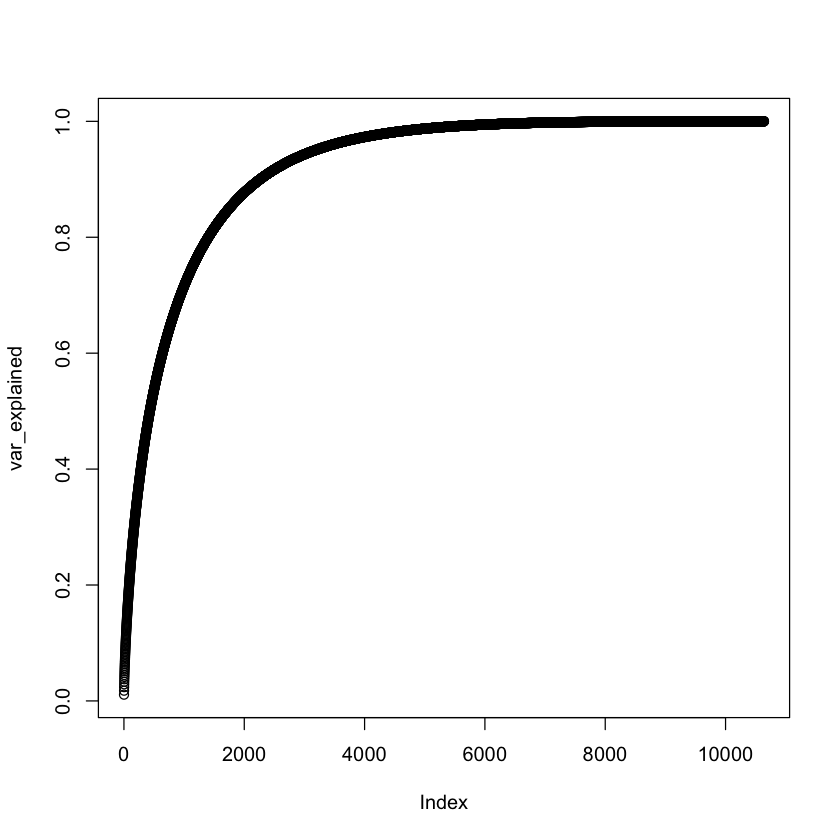

In [60]:
# Variability
var_explained <- cumsum(pca$sdev^2/sum(pca$sdev^2))
plot(var_explained)

In [61]:
# Factorization of the 4000 first principal components, which explain almost all the variability 

k <- 4000

pred <- pca$x[,1:k] %*% t(pca$rotation[,1:k])
colnames(pred) <- colnames(r)

In [62]:
# Note: This process could take several very long minutes

interaction <- 
    data.frame(userId = as.numeric(rownames(r)), pred, check.names = FALSE) %>% 
    tbl_df %>%
    gather(movieId, b_ui, -userId) %>% 
    mutate(movieId = as.numeric(movieId))

In [63]:
# Clean up memory
rm(pred, pca, r)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11688902,624.3,38831430,2073.9,38831430,2073.9
Vcells,2453317016,18717.4,7543008298,57548.6,6284171678,47944.5


In [64]:
# Note: This process could take several very long hours

joined <- test_set %>% 
  left_join(movie_reg_means, by='movieId') %>% 
  left_join(user_reg_means, by='userId') %>% 
  left_join(interaction, by=c('movieId','userId')) %>%
  replace_na(list(b_i=0, b_u=0, b_ui=0))

predictions <- joined %>% mutate(resids = rating - mu - joined$b_i - joined$b_u - joined$b_ui)
head(predictions)

userId,movieId,rating,timestamp,title,genres,b_i,n_i,b_u,b_ui,resids
1,370,5,838984596,Naked Gun 33 1/3: The Final Insult (1994),Action|Comedy,-0.5553663,5860,1.2673930,0.0003369344,0.77518352
1,520,5,838984679,Robin Hood: Men in Tights (1993),Comedy,-0.5002730,5778,1.2673930,0.0005309535,0.71989611
2,590,5,868245608,Dances with Wolves (1990),Adventure|Drama|Western,0.2307889,18738,-0.2078822,0.0113752872,1.45326510
2,648,2,868244699,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller,-0.1254757,15193,-0.2078822,0.0101497655,-1.18924478
2,719,3,868246191,Multiplicity (1996),Comedy,-0.5195732,3170,-0.2078822,0.0030670347,0.21193543
2,786,3,868244562,Eraser (1996),Action|Drama|Thriller,-0.3399466,7124,-0.2078822,0.0059796003,0.02939632


In [65]:
predicted_ratings <- mu + predictions$b_i + predictions$b_u + predictions$b_ui

matrix_decomp_model_rmse <- RMSE(predicted_ratings, predictions$rating)
rmse_results <- bind_rows(rmse_results,
                          data_frame(method = "Matrix Factorization",  
                                     RMSE = matrix_decomp_model_rmse))
rmse_results %>% kable



|method                                                |      RMSE|
|:-----------------------------------------------------|---------:|
|Just the average                                      | 1.0602472|
|Movie effect model                                    | 0.9435966|
|Regularized movie effect model, lambda = 2.75         | 0.9435107|
|Regularized movie and user effects model, lambda2 = 5 | 0.8654773|
|Matrix Factorization                                  | 0.8652532|

In [66]:
# --- NAIVE BAYES CLASSIFICATION ---------------------------------------

cols <- c("userId", "movieId", "rating", "genres")
predictions[,cols] <- data.frame(apply(predictions[cols], 2, as.factor))

In [67]:
# Note: This process could take several minutes

library(e1071)

nb_fit <- naiveBayes(rating ~ userId + movieId + genres + resids, data = predictions[, -c(4:5, 7:10)], laplace = 1e-3)
nb_pred <- predict(nb_fit, predictions[, -c(3:5, 7:10)])

In [68]:
# --- ACCURACY ---------------------------------------------------------

val_nb <- predictions %>% mutate(nb_pred)

matches_nb <- val_nb[val_nb$rating == val_nb$nb_pred,]
accuracy_nb <- round((nrow(matches_nb)/nrow(val_nb))*100, 2)

cat("The accuracy with the test set is", accuracy_nb)

The accuracy with the test set is 69.27

Although the assumption of independence of the predictor variables is not fulfilled here, we can see that naive Bayes actually does a good job in practice!

In [71]:
# Clean up memory
rm(test_index, train_set, test_set,
   RMSE, mu, predictions, naive_rmse,
   rmse_results, movie_means, joined, predicted_ratings, model1_rmse,
   lambdas, tmp, rmses, lambda, movie_reg_means, model1_reg_rmse,
   lambdas_2, lambda_2, user_reg_means, model2_reg_rmse,
   new_train_set, var_explained, k, interaction, matrix_decomp_model_rmse,
   cols, nb_fit, nb_pred, val_nb, matches_nb, accuracy_nb)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11698142,624.8,38831430,2073.9,38831430,2073.9
Vcells,91449333,697.8,6034406638,46038.9,6284171678,47944.5


### Validation

The best lambda (which minimizes the RMSE) for the movie effect is: 2.5

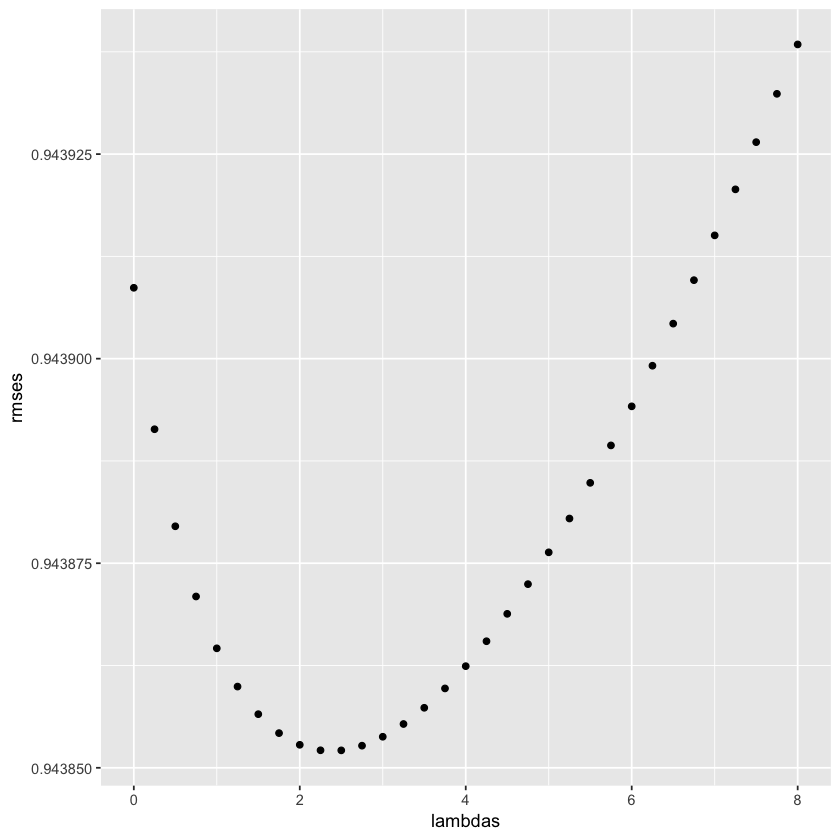

In [72]:
# --- REGULARIZATION OF THE MOVIE EFFECT --------------------

# Compute regularized estimates of b_i using lambda. Let's first try a few values of lambda and pick the best one.
lambdas <- seq(0, 8, 0.25)

mu <- mean(edx$rating)

tmp <- edx %>% 
  group_by(movieId) %>% 
  summarize(sum = sum(rating - mu), n_i = n())

rmses <- sapply(lambdas, function(l){
  joined <- validation %>% 
    left_join(tmp, by='movieId') %>% 
    mutate(b_i = sum/(n_i+l))
    predicted_ratings <- mu + joined$b_i
    return(RMSE(predicted_ratings, validation$rating))
})

cat("The best lambda (which minimizes the RMSE) for the movie effect is:", lambdas[which.min(rmses)])

qplot(lambdas, rmses)

In [73]:
# So it looks like a value of lambda = 2.5 gives us the smallest RMSE

lambda <- 2.5

movie_reg_means <- edx %>% 
  group_by(movieId) %>% 
  summarize(b_i = sum(rating - mu)/(n()+lambda), n_i = n()) 

joined <- validation %>% 
  left_join(movie_reg_means, by='movieId') %>% 
  replace_na(list(b_i=0))

predicted_ratings <- mu + joined$b_i

model1_reg_rmse <- RMSE(predicted_ratings, validation$rating)

# Create a table that's going to store the results that we obtain as we're goinng to compare different effects.
rmse_results <- data_frame(method = "Regularized movie effect model, validation",  
                                     RMSE = model1_reg_rmse )

The best lambda_2 (which minimizes the RMSE) for the user and movie effects is 5.25

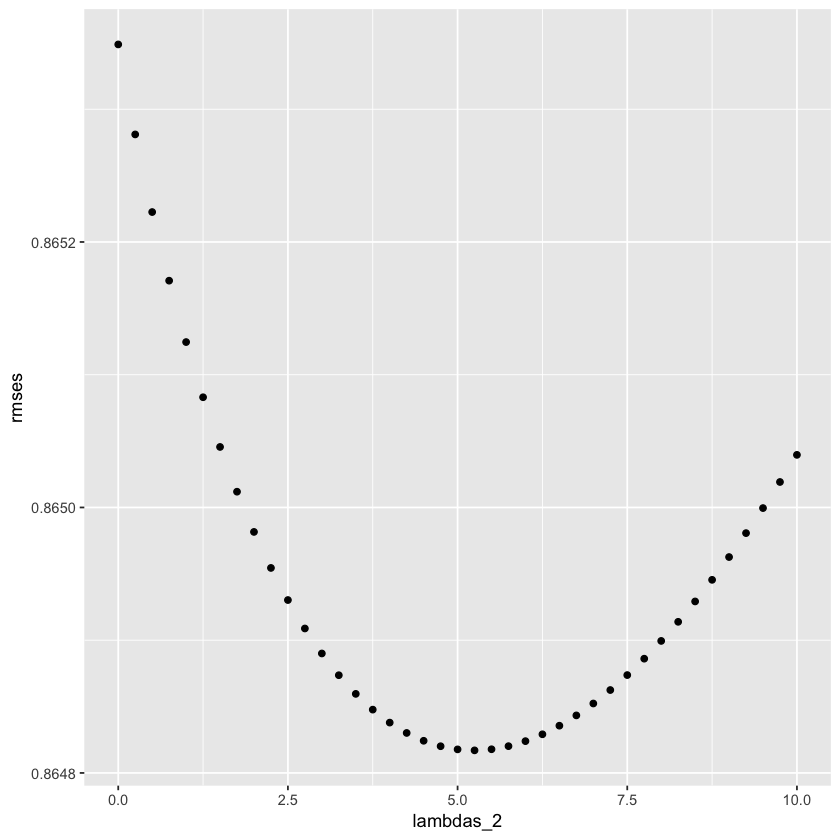

In [74]:
# --- REGULARIZATION OF THE USER AND MOVIE EFFECTS ----------

# Compute regularized estimates of b_i using lambda_2. Let's first try a few values of lambda_2 and pick the best one.

lambdas_2 <- seq(0, 10, 0.25)

rmses <- sapply(lambdas_2, function(l){

  mu <- mean(edx$rating)
  
  b_i <- edx %>% 
    group_by(movieId) %>%
    summarize(b_i = sum(rating - mu)/(n()+l))
  
  b_u <- edx %>% 
    left_join(b_i, by="movieId") %>%
    group_by(userId) %>%
    summarize(b_u = sum(rating - b_i - mu)/(n()+l))

  predicted_ratings <- validation %>%
    left_join(b_i, by = "movieId") %>%
    left_join(b_u, by = "userId") %>%
    mutate(pred = mu + b_i + b_u) %>%
    .$pred
  
    return(RMSE(predicted_ratings, validation$rating))
})

cat("The best lambda_2 (which minimizes the RMSE) for the user and movie effects is", lambdas_2[which.min(rmses)])

qplot(lambdas_2, rmses)  

In [75]:
# So it looks like a value of lambda_2 = 5.25 gives us the smallest RMSE

lambda_2 <- 5.25

user_reg_means <- edx %>% 
  left_join(movie_reg_means) %>%
  mutate(resids = rating - mu - b_i) %>% 
  group_by(userId) %>%
  summarize(b_u = sum(resids)/(n()+lambda_2))

joined <- validation %>% 
  left_join(movie_reg_means, by='movieId') %>% 
  left_join(user_reg_means, by='userId') %>% 
  replace_na(list(b_i=0, b_u=0))

predicted_ratings <- mu + joined$b_i + joined$b_u

model2_reg_rmse <- RMSE(predicted_ratings, validation$rating)

rmse_results <- bind_rows(rmse_results,
                          data_frame(method = "Regularized movie and user effects model, validation",  
                                     RMSE = model2_reg_rmse ))
rmse_results %>% kable

Joining, by = "movieId"




|method                                               |      RMSE|
|:----------------------------------------------------|---------:|
|Regularized movie effect model, validation           | 0.9438521|
|Regularized movie and user effects model, validation | 0.8648427|

In [76]:
# --- MATRIX DECOMPOSITION ---------------------------------------------

# We use PCA to uncover patterns in user/movie relationships

# First, tet's remove the user and movie bias to create residuals
new_edx <- edx %>% 
  left_join(movie_reg_means, by = "movieId") %>% 
  left_join(user_reg_means, by = "userId") %>%
  mutate(resids = rating - mu - b_i - b_u)

In [77]:
# Next we create a matrix using spread()
# Note: This process could take several minutes

r <- new_edx %>% 
  select(userId, movieId, resids) %>%
  spread(movieId, resids) %>% 
  as.matrix()

rownames(r) <- r[,1]
r <- r[,-1]
r[is.na(r)] <- 0 # For the sake of simplicity, we just apply 0 to all missing data

In [78]:
# Singular value decomposition
# Note: This process could take several long minutes

pca <- prcomp(r - rowMeans(r), center = TRUE, scale = FALSE)

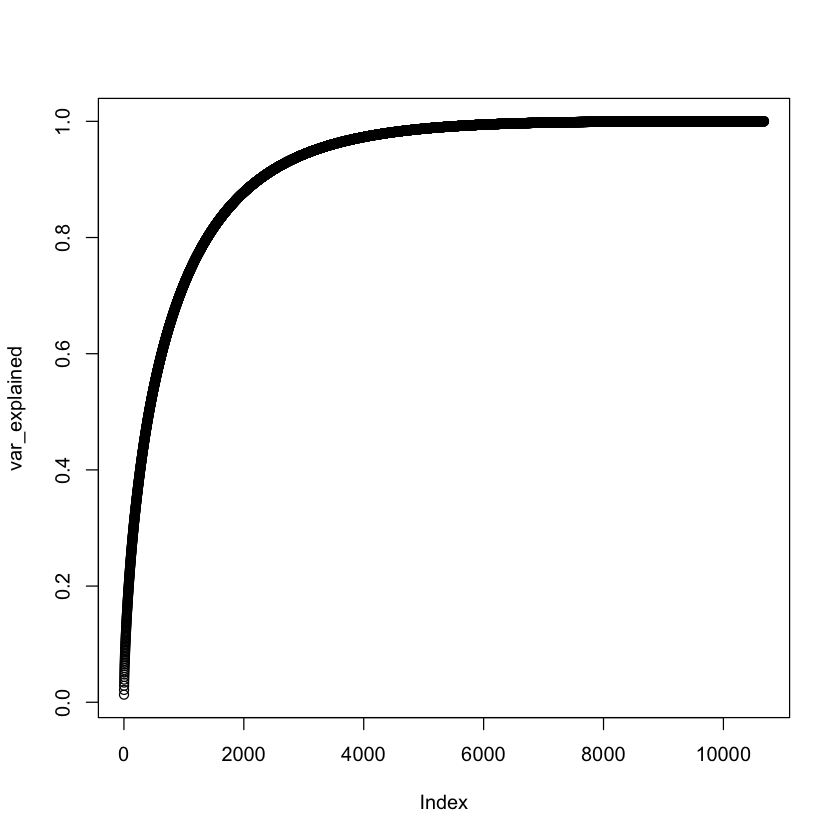

In [79]:
# Variability
var_explained <- cumsum(pca$sdev^2/sum(pca$sdev^2))
plot(var_explained)

In [80]:
# Factorization of the 4000 first principal components, which explain almost all the variability 

k <- 4000

pred <- pca$x[,1:k] %*% t(pca$rotation[,1:k])
colnames(pred) <- colnames(r)

In [81]:
# Note: This process could take several very long minutes

interaction <- 
    data.frame(userId = as.numeric(rownames(r)), pred, check.names = FALSE) %>% 
    tbl_df %>%
    gather(movieId, b_ui, -userId) %>% 
    mutate(movieId = as.numeric(movieId))

In [82]:
# Clean up memory
rm(pred, pca, r)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11699056,624.8,38831430,2073.9,38831430,2073.9
Vcells,2414885247,18424.2,7513794689,57325.8,6284171678,47944.5


In [83]:
# Note: This process could take several very long hours

joined <- validation %>% 
  left_join(movie_reg_means, by='movieId') %>% 
  left_join(user_reg_means, by='userId') %>% 
  left_join(interaction, by=c('movieId','userId')) %>%
  replace_na(list(b_i=0, b_u=0, b_ui=0))

predictions <- joined %>% mutate(resids = rating - mu - joined$b_i - joined$b_u - joined$b_ui)
head(predictions)

userId,movieId,rating,timestamp,title,genres,b_i,n_i,b_u,b_ui,resids
1,231,5,838983392,Dumb & Dumber (1994),Comedy,-0.57725414,16053,1.3155986,0.009465704,0.739724617
1,480,5,838983653,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,0.15104374,29360,1.3155986,0.017071745,0.003820699
1,586,5,838984068,Home Alone (1990),Children|Comedy,-0.45673029,13800,1.3155986,0.004302472,0.624363993
2,151,3,868246450,Rob Roy (1995),Action|Drama|Romance|War,0.01758713,7186,-0.1806494,0.001652159,-0.351055067
2,858,2,868245645,"Godfather, The (1972)",Crime|Drama,0.90277360,17747,-0.1806494,0.002502701,-2.237092085
2,1544,3,868245920,"Lost World: Jurassic Park, The (Jurassic Park 2) (1997)",Action|Adventure|Horror|Sci-Fi|Thriller,-0.56699338,7328,-0.1806494,0.001834233,0.233343370


In [84]:
predicted_ratings <- mu + predictions$b_i + predictions$b_u + predictions$b_ui

matrix_decomp_model_rmse <- RMSE(predicted_ratings, predictions$rating)
rmse_results <- bind_rows(rmse_results,
                          data_frame(method = "Matrix Factorization, validation",  
                                     RMSE = matrix_decomp_model_rmse))
rmse_results %>% kable



|method                                               |      RMSE|
|:----------------------------------------------------|---------:|
|Regularized movie effect model, validation           | 0.9438521|
|Regularized movie and user effects model, validation | 0.8648427|
|Matrix Factorization, validation                     | 0.8644608|

In [85]:
# --- NAIVE BAYES CLASSIFICATION ---------------------------------------

cols <- c("userId", "movieId", "rating", "genres")
predictions[,cols] <- data.frame(apply(predictions[cols], 2, as.factor))

In [86]:
# Note: This process could take several minutes

nb_fit <- naiveBayes(rating ~ userId + movieId + genres + resids, data = predictions[, -c(4:5, 7:10)], laplace = 1e-3)
nb_pred <- predict(nb_fit, predictions[, -c(3:5, 7:10)])

In [87]:
# --- ACCURACY ---------------------------------------------------------

val_nb <- predictions %>% mutate(nb_pred)

matches_nb <- val_nb[val_nb$rating == val_nb$nb_pred,]
accuracy_nb <- round((nrow(matches_nb)/nrow(val_nb))*100, 2)

cat("The accuracy with the validation set is", accuracy_nb)

The accuracy with the validation set is 71.07

## 5. Conclusion 

In this project, we started with an exploratory analysis of the data, which provided interesting insights such as:

- The edx dataset as provided is already curated, ready to use. No missing values, no wrong formatting, no much data engineering is required.

- the dataset contains 2 parts of about equally sizes, one set before 18 February 2003 with full star rating from 1 star to 5 stars by increment of 1 star and another set after that date with 0.5 star increment for a range from 0.5 star to 5 stars.

- The overall average of ratings, at about 3.5 stars, is rather consistent over the whole dataset.

- There is a clear dependence between users and movies for ratings. There is a correlation pattern (users have preferences of movies) that should be taken into account during the modeling.

- The effect of various sample sizes in ratings. So this also needs to be considered in our model.

Other insights about best movies, most popular genres, movies production, are more for general information.

Following the exploratory phase, we built our predictive model based on a blend of **regularized user and movie effects** and **matrix factorization**. In the matrix factorization, we used a Principal Component Analysis approach to uncover the user/movie interactions.
The final step was to call a **naive Bayes** model to classify our predicted ratings in the range of 0.5 star to 5 stars with increment of 0.5 star and estimate the accuracy or our predictions.   

**1. RMSE metric.**

Our predictive model yields a very good RMSE. The RMSEs at the various steps of our blend of techniques are summarized in the table below:

| Method                                    | RMSE  |
|:------------------------------------------|:-----:|
| Movie effect with regularization          | 0.9439|
| User and movie effects with regularization| 0.8648|
| Matrix factorization                      | 0.8645|


**2. Accuracy metric.**

The accuracy metric implies first a classification of our predicted ratings, which are continuous variables, into class of ratings and the naive Bayes did perform amazingly well.

The final accuracy, with the validation set, reaches 71.1%.

Note that we tried to call naive Bayes on separated sets, before and after 18 Feb 2003. The small accuracy improvement is not worth mentioning in this report. Naive Bayes performs very well on the whole dataset.


**3. Important note:**

We believe the RMSE metric is optimized but we could possibly improve the accuracy metric with more sophisticated classifiers, for example based on Nearest Neighbors approach.

Nevertheless, we couldn't move forward with sophisticated models, due to the size of our dataset and the limited machine resources allocated to this project.